
# <font color = green> *Telecom Churn Assignment*
    
    Prepared By - Ajas, Sonal, Abhinandan
    Group       - DSC62
    Date        - 05/07/2024
    



***Note: The file may take some time to execute as per the model used.***

## Problem Statement

#### Business problem overview
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

- For many incumbent operators, retaining high profitable customers is the number one business goal.

- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Objective
- To Predict the customers who are about to churn from a telecom operator
- Business Objective is to predict the High Value Customers only
- We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling) Churn would be based on Usage
#### Requirement:
1) Churn Prediction Model
2) Best Predictor Variables

### Approach The Best Solution

1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

3. Derive new features.

4. Reduce the number of variables using PCA.

5. Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

6. Evaluate the models using appropriate evaluation metrics. Note that it is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

7. Finally, choose a model based on some evaluation metric.

### Importing libraries

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Markdown, display ,HTML

# libraries for Model building and evalution
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression ,RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE, ADASYN

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 10000)
pd.options.display.max_seq_items = 2000

In [3]:
# read data
churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# createing backup of data

original = churn.copy()

In [5]:
# checking the shape of the data 

churn.shape

(99999, 226)

In [6]:
#checking the columns of data

churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7'

In [7]:
#checking dataframe for null and datatype 

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
#Checking the numerical columns data distribution statistics

churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
# Checking info() of the dataframe

churn.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

### Data Understanding :

- Dataframe is having 99999 rows and 226 columns.

- 12 column having Object type, 179 column having Float and 35 column is having Intiger type.

- We can see that there are missing values present in our data.

In [10]:
# Sorting % of null valaues of each column in decending order

x = (churn.isnull().sum()/len(churn)*100)
x.sort_values(ascending = False).head(50)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

In [11]:
# Checking for the duplicates

churn.drop_duplicates(subset=None, inplace=True)
churn.shape

(99999, 226)

In [12]:
#check the dimensions of data
churn.ndim

2

In [13]:
# create column name list by types of columns

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("# ID cols: %d\n# Date cols: %d\n# Numeric cols: %d\n# Category cols: %d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

# ID cols: 2
# Date cols: 12
# Numeric cols: 204
# Category cols: 8
True


# EXPLORATORY DATA ANALYSIS

### Data Cleaning & Treatment:

In [14]:
# Let's check the values for highly missing value's columns

churn[[
    'count_rech_2g_6', 'date_of_last_rech_data_6', 'count_rech_3g_6',
    'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6', 'arpu_3g_6',
    'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'arpu_3g_7',
    'count_rech_2g_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7',
    'av_rech_amt_data_7', 'max_rech_data_7', 'night_pck_user_7',
    'total_rech_data_7', 'date_of_last_rech_data_7', 'night_pck_user_9',
    'date_of_last_rech_data_9', 'fb_user_9', 'arpu_2g_9', 'max_rech_data_9',
    'arpu_3g_9', 'total_rech_data_9', 'av_rech_amt_data_9', 'count_rech_3g_9',
    'count_rech_2g_9', 'fb_user_8', 'av_rech_amt_data_8', 'count_rech_3g_8',
    'count_rech_2g_8', 'date_of_last_rech_data_8', 'total_rech_data_8',
    'max_rech_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8'
]].head(10)

,count_rech_2g_6,date_of_last_rech_data_6,count_rech_3g_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6,arpu_3g_7,count_rech_2g_7,fb_user_7,count_rech_3g_7,arpu_2g_7,av_rech_amt_data_7,max_rech_data_7,night_pck_user_7,total_rech_data_7,date_of_last_rech_data_7,night_pck_user_9,date_of_last_rech_data_9,fb_user_9,arpu_2g_9,max_rech_data_9,arpu_3g_9,total_rech_data_9,av_rech_amt_data_9,count_rech_3g_9,count_rech_2g_9,fb_user_8,av_rech_amt_data_8,count_rech_3g_8,count_rech_2g_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,arpu_3g_8,arpu_2g_8,night_pck_user_8
0,0.0,6/21/2014,1.0,252.0,252.0,1.0,212.17,212.17,0.0,1.0,212.17,0.0,1.0,1.0,212.17,252.0,252.0,0.0,1.0,7/16/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,252.0,1.0,0.0,8/8/2014,1.0,252.0,212.17,212.17,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.0,1.0,0.0,28.61,154.0,154.0,0.0,1.0,7/25/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50.0,0.0,2.0,8/10/2014,2.0,25.0,0.00,7.60,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9/17/2014,1.0,0.0,46.0,2.84,1.0,46.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,6/4/2014,0.0,56.0,56.0,1.0,0.00,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.0,1.0,0.0,0.00,177.0,154.0,0.0,2.0,7/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,69.0,0.0,3.0,8/23/2014,3.0,23.0,19.83,0.00,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.0,1.0,0.0,0.00,154.0,154.0,0.0,1.0,7/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Impute missing values

In [15]:
# Let's verify the minimum value for all the  recharge column

recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_columns].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


We can create new feature as **total_rech_amt_data** using **total_rech_data** and **av_rech_amt_data** to capture amount utilized by customer for data.

In the recharge variables whereever minumum value is 1, we can impute missing values as zero since it means customer didn't recharge their number that month.

In [16]:
# List out the columns for zero imputation
zero_impute_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

# Let's  impute the missing values with zeros
churn[zero_impute_columns] = churn[zero_impute_columns].apply(lambda x: x.fillna(0))

# Let's check missing value ratio after imputation
print("Missing value ratio after inputation:\n")
print(churn[zero_impute_columns].isnull().sum()*100/churn.shape[1])

Missing value ratio after inputation:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [17]:
# Droping the date and ID columns as those are not provideing any information regarding business model.

print("Shape before dropping date and ID columns : {}".format(churn.shape))
churn.drop(id_cols+date_cols, axis=1, inplace=True)
print("Shape after dropping date and ID columns : {}".format(churn.shape))

Shape before dropping date and ID columns : (99999, 226)
Shape after dropping date and ID columns : (99999, 212)


In [18]:
# Let's check the missing values in categorical Column

(churn[cat_cols].isnull().sum()/len(churn))*100

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [19]:
# replaceing missing values with '-1' in categorical columns

churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna('-1'))

In [20]:
# missing value ratio after imputation

churn[cat_cols].isnull().sum()*100/churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

#### Drop the variables for which more than 40% values are missing

In [21]:
# Find the variable for which more than 40% values are missing

missing_values = churn.isnull().sum()*100/len(churn)
column_to_be_drop = missing_values[missing_values>50].index

# Drop the variables for which more than  40% values are  missing

churn.drop(column_to_be_drop, axis=1, inplace=True)

# look at missing value ratio after droping the variable

churn_missing = churn.isnull().sum()*100/churn.shape[0]
churn_missing.sort_values(ascending=False).head(20)

std_ic_t2t_mou_9    7.745077
loc_og_t2t_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
loc_og_mou_9        7.745077
std_og_t2t_mou_9    7.745077
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_9    7.745077
std_og_mou_9        7.745077
isd_og_mou_9        7.745077
spl_og_mou_9        7.745077
og_others_9         7.745077
spl_ic_mou_9        7.745077
loc_ic_t2t_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
loc_ic_mou_9        7.745077
std_ic_t2m_mou_9    7.745077
std_ic_t2f_mou_9    7.745077
std_ic_t2o_mou_9    7.745077
dtype: float64

In [22]:
# Let's check the  the number of columns for which we are left with the missing values

len(churn_missing[churn_missing > 0])

119

#### Find and drop the zero variance columns
We will be dropping the zero variance columns or unique value columns as they dont provide any useful insight.

In [23]:
# Find the zero  variance columns

zero_variance_columns = pd.DataFrame(churn.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print("Zero Variance Variables are as follows: \n {} \n\n".format(zero_variance_columns[zero_variance_columns['nunique'] == 1]))

# Drop the Zero variance columns

churn.drop(list(zero_variance_columns[zero_variance_columns['nunique'] == 1]['feature']),axis=1, inplace=True)

print("Shape after dropping the zero variance variables : ", churn.shape)

Zero Variance Variables are as follows: 
               feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1 


Shape after dropping the zero variance variables :  (99999, 185)


In [24]:
# look at missing value ratio after droping the zero variance variables

churn_missing = churn.isnull().sum()*100/churn.shape[0]
churn_missing[churn_missing > 0].sort_values(ascending=False)

ic_others_9         7.745077
std_ic_t2m_mou_9    7.745077
loc_ic_t2t_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
spl_og_mou_9        7.745077
loc_og_t2m_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
std_og_t2m_mou_9    7.745077
loc_ic_mou_9        7.745077
loc_og_t2t_mou_9    7.745077
std_ic_t2t_mou_9    7.745077
loc_og_mou_9        7.745077
og_others_9         7.745077
roam_og_mou_9       7.745077
isd_og_mou_9        7.745077
std_ic_t2f_mou_9    7.745077
roam_ic_mou_9       7.745077
std_og_mou_9        7.745077
std_ic_mou_9        7.745077
offnet_mou_9        7.745077
spl_ic_mou_9        7.745077
std_og_t2t_mou_9    7.745077
isd_ic_mou_9        7.745077
onnet_mou_9         7.745077
std_og_t2f_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
spl_og_mou_8        5.378054
std_og_mou_8        5.378054
og_others_8         5.378054
loc_ic_mou_8        5.378054
loc_ic_t2t_mou_8    5.378054
loc_ic_t2m_mou_8    5.378054
loc_ic_t2f_mou_8    5.378054
std_ic_t2t_mou

In [25]:
churn[churn_missing[churn_missing > 0].index].head(20)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN
1,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.0,0.00,0.00,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,47.64,108.68,120.94,18.04,0.0,0.00,0.00,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.00,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01,0.93,3.14,0.00,0.36
3,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.00,29.23,16.63,296.11,236.21,0.0,0.00,0.00,0.0,10.96,0.00,18.09,43.29,0.00,0.0,0.0,0.00,62.08,19.98,8.04,41.73,113.96,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.00,0.00,0.00,45.99,105.01,4.94,143.83,0.59,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80
4,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,14

As all the missing values are of data type float, so imputing all the variable with **median**.

In [26]:
# Impute the missing values with median

for col in churn_missing[churn_missing > 0].index:
    churn[col].fillna(churn[col].median(),inplace=True)

In [27]:
# look at missing value ratio after Imputation

churn_missing = churn.isnull().sum()*100/churn.shape[0]
churn_missing.sort_values(ascending=False).head(20)

arpu_6                0.0
total_rech_amt_9      0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
std_ic_t2m_mou_7      0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
dtype: float64

In churn prediction, we assume that there are three phases of customer lifecycle :

- The ‘good & action’ phase [Month 6, 7 & 8]
- The ‘churn’ phase [Month 9] In this case, since we are working over a three-month window, the first three months are the ‘good & action’ phase, the fourth month is the __‘churn’__ phase.

### Filter High-Value Customers

Variable av_rech_amt_data has more than 70% values as 0 in both the 6th and 7th month. So, this variable will not have an impact on the target variable. Hence, we are not considering this variable.

To filter the high value customer records:

- Derive the column of average reacharge amount for Jun and Jul month(the good phase).
- Take only the records that is more than the 70th percentile of the average recharge amount.
- Drop the newly derived column which is not required.
- Print the count of rows and columns of new filtered dataframe.

In [28]:
# so let's calculate total_data_rech_amt for 6,7,8,9 month

churn['total_data_rech_amt_6']=churn["total_rech_data_6"]*churn["av_rech_amt_data_6"]
churn['total_data_rech_amt_7']=churn["total_rech_data_7"]*churn["av_rech_amt_data_7"]
churn['total_data_rech_amt_8']=churn["total_rech_data_8"]*churn["av_rech_amt_data_8"]
churn['total_data_rech_amt_9']=churn["total_rech_data_9"]*churn["av_rech_amt_data_9"]

In [29]:
# let's drop the columns which are used for creation for new column

churn.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
            'av_rech_amt_data_6','av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], 
           axis=1, inplace=True)

In [30]:
# Get the average recharge amount for 6 and 7 month by combineing & taking average

churn['avg_rech_amt_6_7'] = ( churn['total_rech_amt_6'] + 
                             churn['total_rech_amt_7'] +
                             churn['total_data_rech_amt_6'] + 
                             churn['total_data_rech_amt_7'] ) / 2

In [31]:
# look at the 70th percentile recharge amount

print("Recharge amount at 70th percentile: {0}".format(churn.avg_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [32]:
# Get the data greater than 70th percentile of average recharge amount

churn = churn.loc[(churn['avg_rech_amt_6_7'] > np.percentile(churn['avg_rech_amt_6_7'], 70))]

# drop the average column

churn.drop(['avg_rech_amt_6_7'], axis=1, inplace=True)

print(churn.shape)

(29953, 181)


### Derive the Churn Variable

We need to derive the target variable for classifying the customer which are going to churn. In order to do so we need to do following step:

- Tag the churned customers as 1 else 0 based on the Sep month and derive the Churn(Response) column.

In [33]:
# mark the rows as churn if the sum of the total mou and vol of 9 month is 0

tag_churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
churn['churn'] = np.where(churn[tag_churn_cols].sum(axis=1) == 0, 1, 0 )

To tag the churned customers:

1. Take the columns such as 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'<br>
2. Find the sum of above columns values for each records<br>
3. Tag the customer record as Churned(1) if the sum value is 0 else Non-Churned(0) and derive the Churn column<br>
4. Now check for the count of churned customers in the obtained dataset.

In [34]:
churn['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

0    91.877274
1     8.122726
Name: churn, dtype: float64


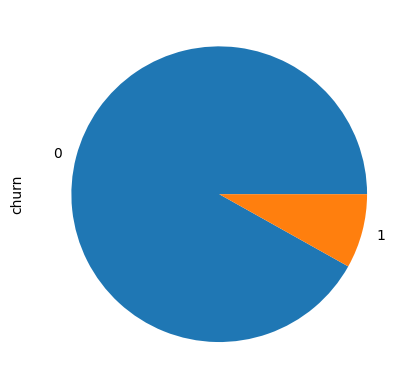

In [35]:
# lets find out churn/non churn percentage

print((churn['churn'].value_counts()/len(churn))*100)
((churn['churn'].value_counts()/len(churn))*100).plot(kind="pie")
plt.show()

As we can see that 90% of the customers do not churn, there is a possibility of class imbalance.
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped from the dataset.

In [36]:
# Removal of september month data as it is utilized in preparation of target column for dataset.
# Get the columns split by months

cols_to_drop = [col for col in churn.columns if '_9' in col]
print(cols_to_drop)

churn.drop(cols_to_drop, axis=1, inplace=True)

churn.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_data_rech_amt_9']


(29953, 138)

In [37]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones

churn_corr = churn.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.955322
total_rech_amt_6  arpu_6              0.946104
total_rech_amt_7  arpu_7              0.943571
isd_og_mou_8      isd_og_mou_7        0.943120
                  isd_og_mou_6        0.918187
isd_og_mou_7      isd_og_mou_6        0.915247
total_ic_mou_6    loc_ic_mou_6        0.895048
total_ic_mou_8    loc_ic_mou_8        0.893145
total_ic_mou_7    loc_ic_mou_7        0.883002
std_og_t2t_mou_8  onnet_mou_8         0.860751
std_og_t2t_mou_7  onnet_mou_7         0.860360
std_og_t2t_mou_6  onnet_mou_6         0.859390
std_og_t2m_mou_7  offnet_mou_7        0.855012
std_og_t2m_mou_8  offnet_mou_8        0.851821
total_og_mou_8    std_og_mou_8        0.850958
total_og_mou_7    std_og_mou_7        0.849559
loc_ic_mou_8      loc_ic_t2m_mou_8    0.846893
std_ic_mou_8      std_ic_t2m_mou_8    0.845714
loc_ic_mou_6      loc_ic_t2m_mou_6    0.844164
loc_og_mou_8      loc_og_mou_7        0.841786
loc_ic_mou_8      loc_ic_mou_7        0.839872
loc_ic_mou_7 

In [38]:
# col_to_drop=['fb_user_6','fb_user_7','fb_user_8' ,'total_ic_mou_7', 'total_ic_mou_8']

# # These columns can be dropped as they are highly collinered with other predictor variables.
# # criteria set is for collinearity of 85%
# # Other Will Delete after verification of Indivisuals

# #  dropping these column
# churn.drop(col_to_drop, axis=1, inplace=True)

## Data preparation

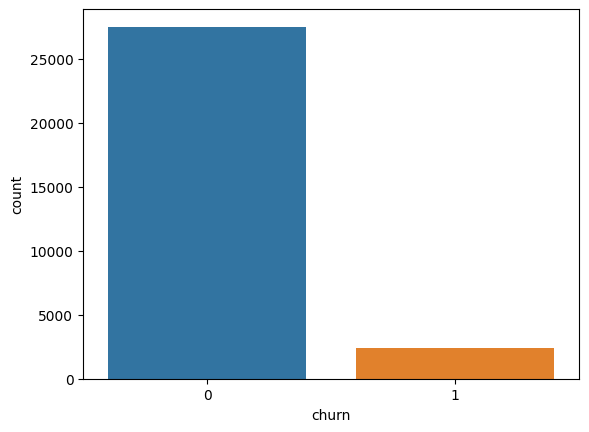

In [39]:
##Lets check Target Variable distribution

sns.countplot(x='churn', data=churn)
plt.show()

As we observed earlier, the churn rate is low in the overall dataset. So we would need to handle the class imbalance.

In [40]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.


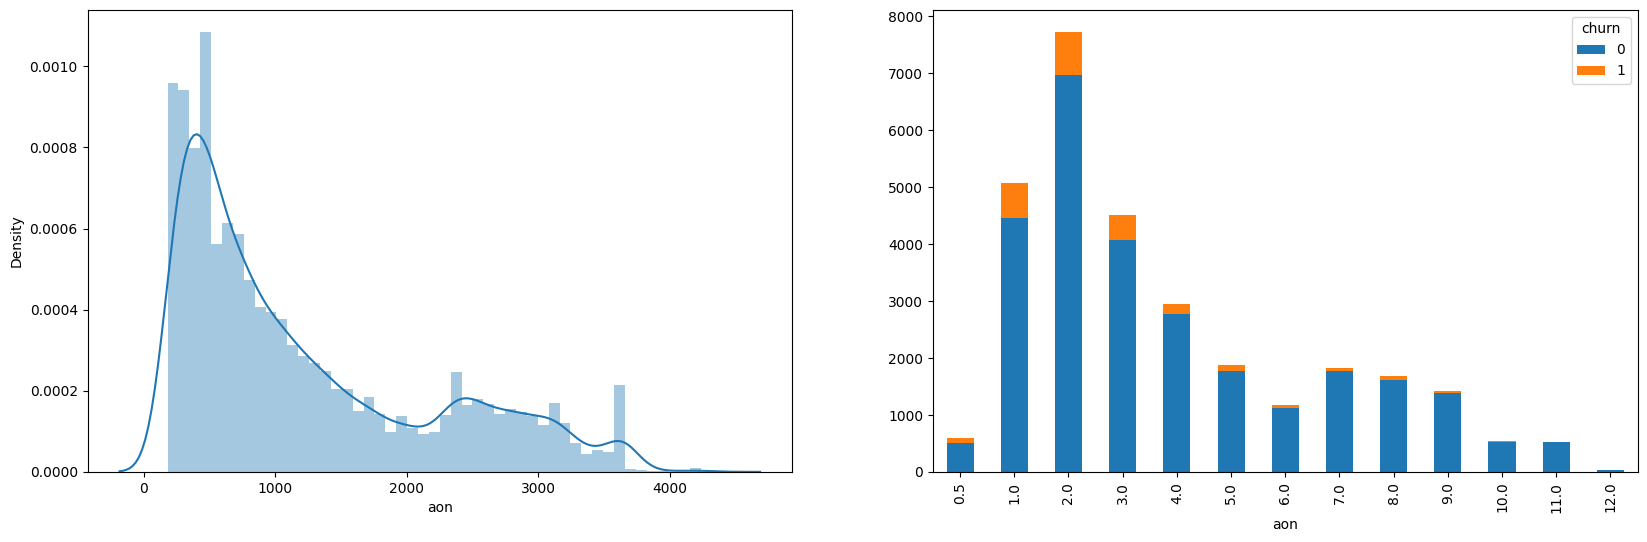

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(churn['aon'], ax=ax1)
# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.crosstab(pd.cut(round(((churn['aon']/30)/12),1), bins = bins, labels = labels ), churn['churn']).plot(kind='bar', stacked=True, ax = ax2)
plt.show()

In [42]:
# creating a new variable 'tenure'
churn['tenure'] = (churn['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn.drop('aon',axis=1, inplace=True)

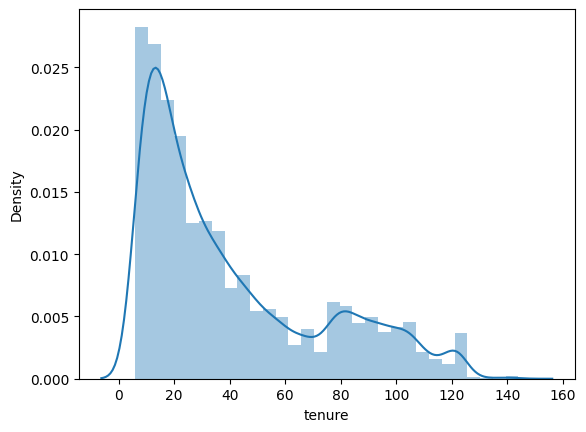

In [43]:
# Checking the distribution of he tenure variable

sns.distplot(churn['tenure'],bins=30)
plt.show()

In [44]:
tn_range = [0, 6, 12, 24, 60, 150]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn['tenure_range'] = pd.cut(churn['tenure'], tn_range, labels=tn_label)
churn['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

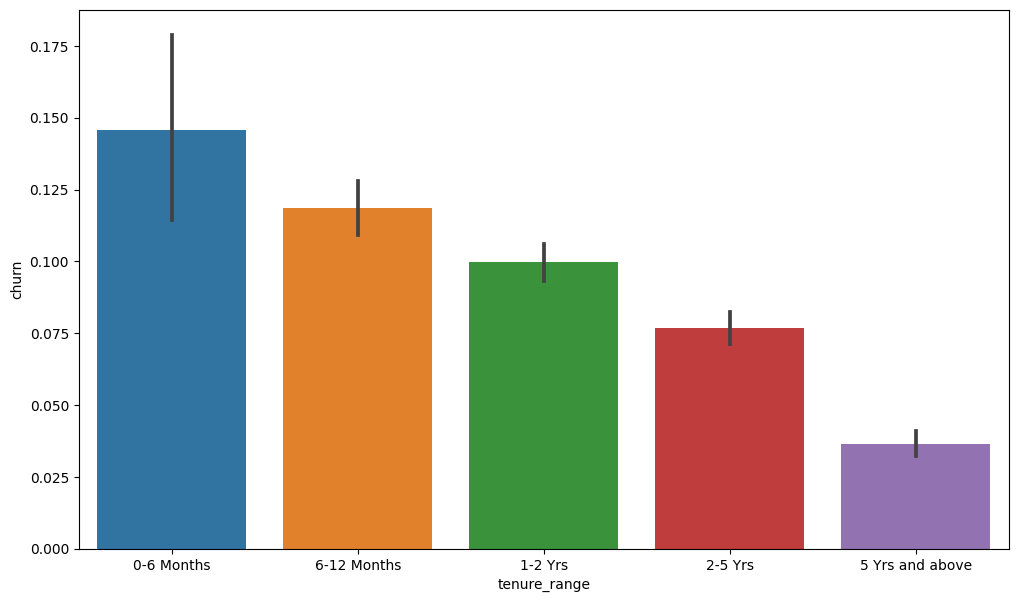

In [45]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churn)
plt.show()

We can observe Churn rate is high during the first 3 years, if the customer stayed more than 5 years, they are less likely to be churned.

In [46]:
# Also We can drop the 'tenure_range' as we have created just for analysis purpose.

churn.drop(['tenure_range'],axis=1, inplace=True)

In [47]:
# define a function to plot a box-plot

def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = churn
    
    plt.subplot(2,3,1)
    plt.title("Plot for month_6")
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    plt.title("Plot for month_7")
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    plt.title("Plot for month_8")
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [48]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index=['Non Churn'])
    mean_df_1 = pd.DataFrame([df_1.mean()],index=['Churn'])

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(12,6),rot=0)
    plt.show()
    
    return mean_bar

### Recharge amount related variables

In [49]:
#Recharge amount related variables

recharge_amnt =  churn.columns[churn.columns.str.contains('rech_amt')]
recharge_amnt.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8']

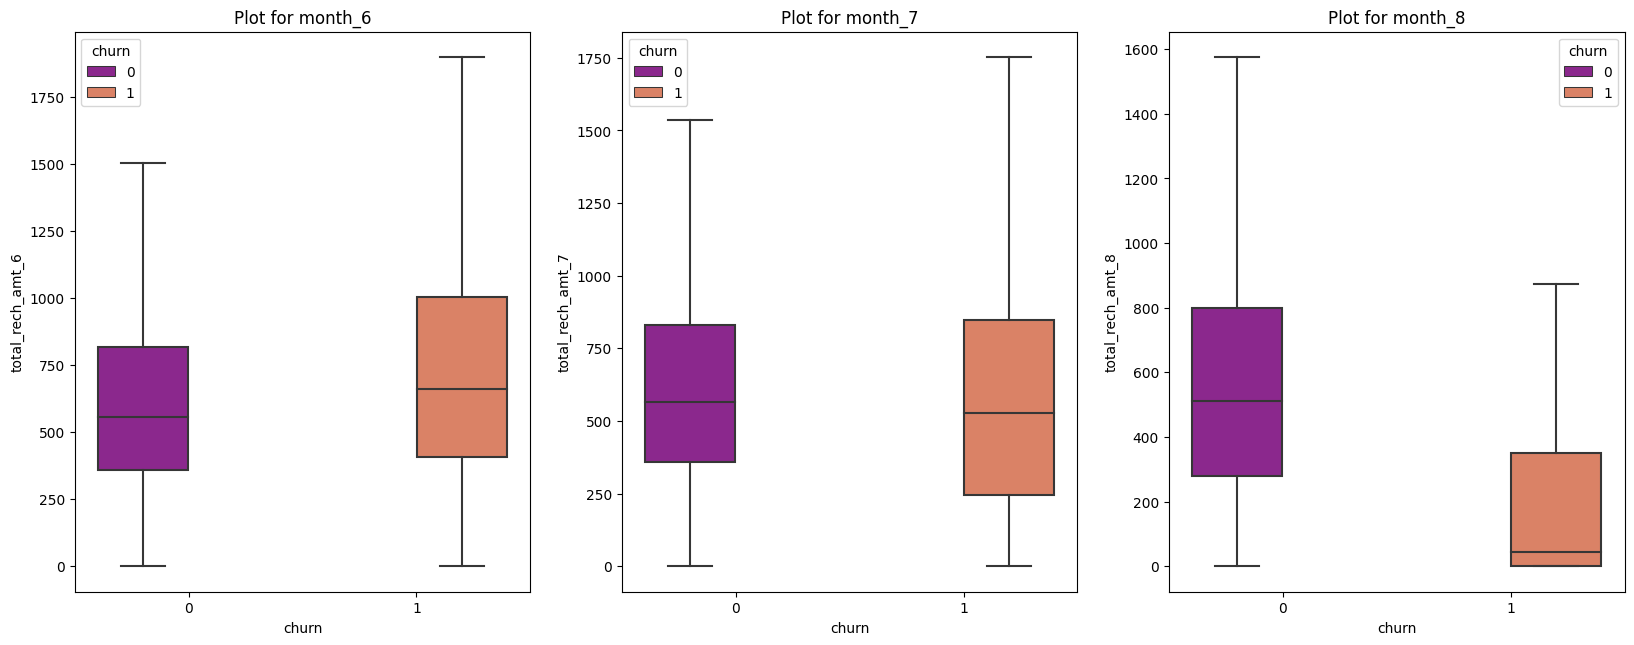

In [50]:
# Ploting for total recharge amount:

plot_box_chart('total_rech_amt')
plt.show()

We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase)

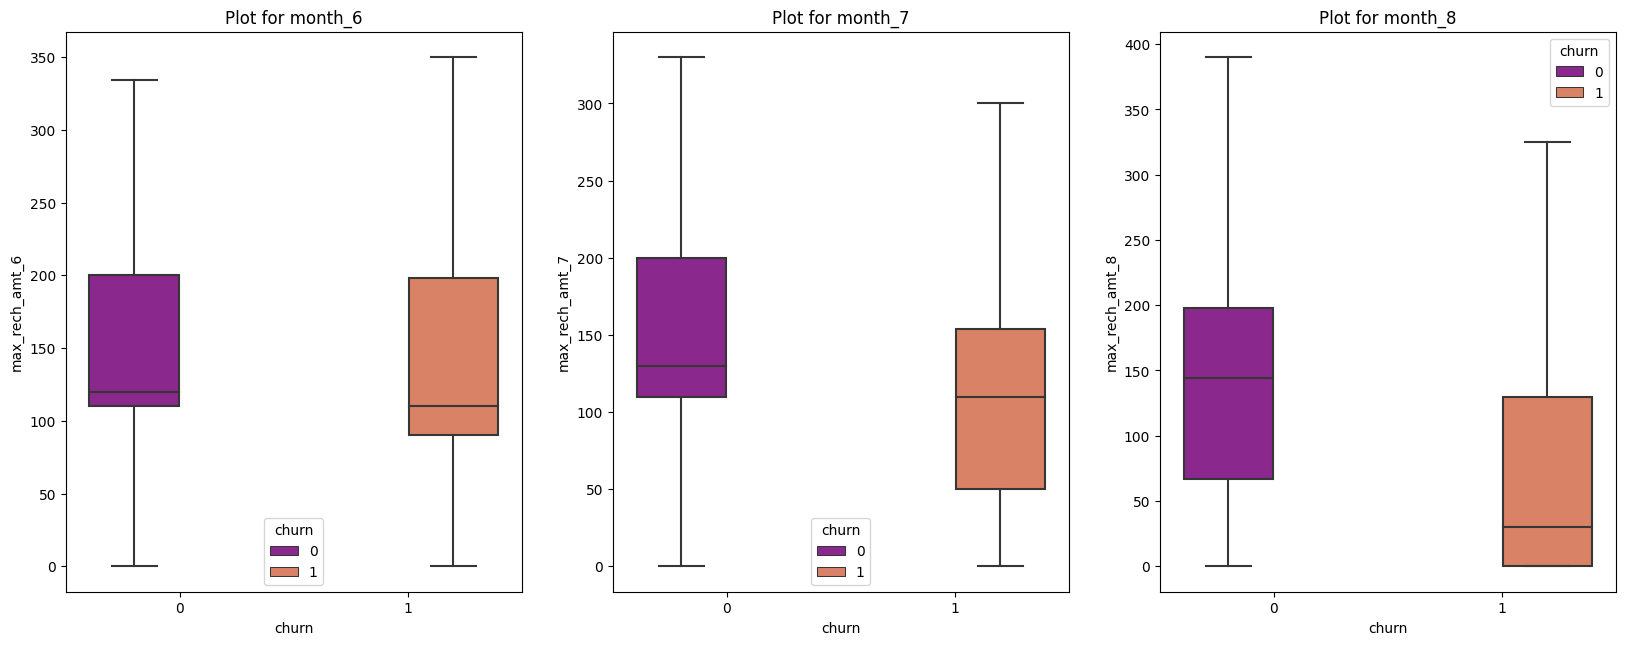

In [51]:
# Ploting for maximum recharge amount for data:

plot_box_chart('max_rech_amt')
plt.show()

We can see that there is a huge drop in the maximum recharge amount for data in the 8th month (action phase) for churned customers.

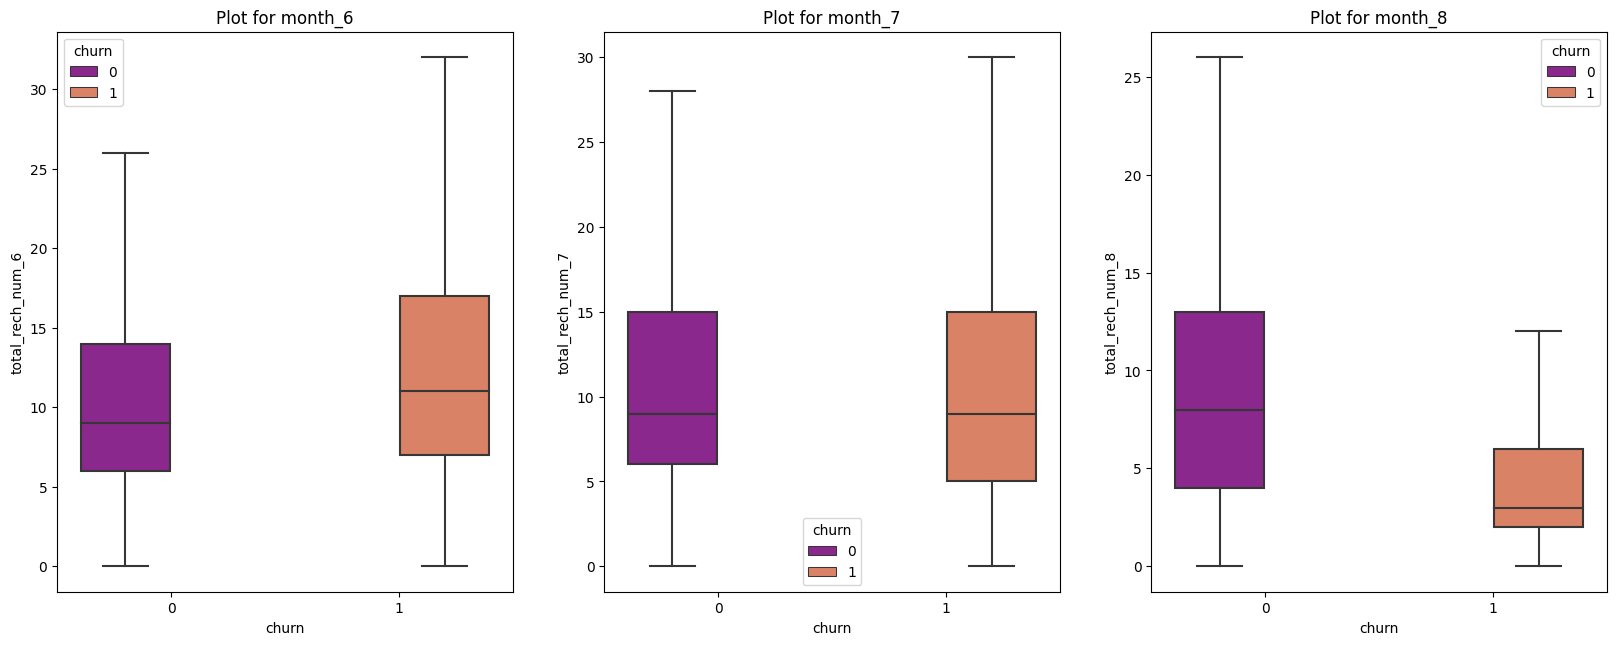

In [52]:
# Ploting for Total recharge for Number:

plot_box_chart('total_rech_num')
plt.show()

We can see that there is a drop in the total recharge number also in the 8th month (action phase) for churned customers.

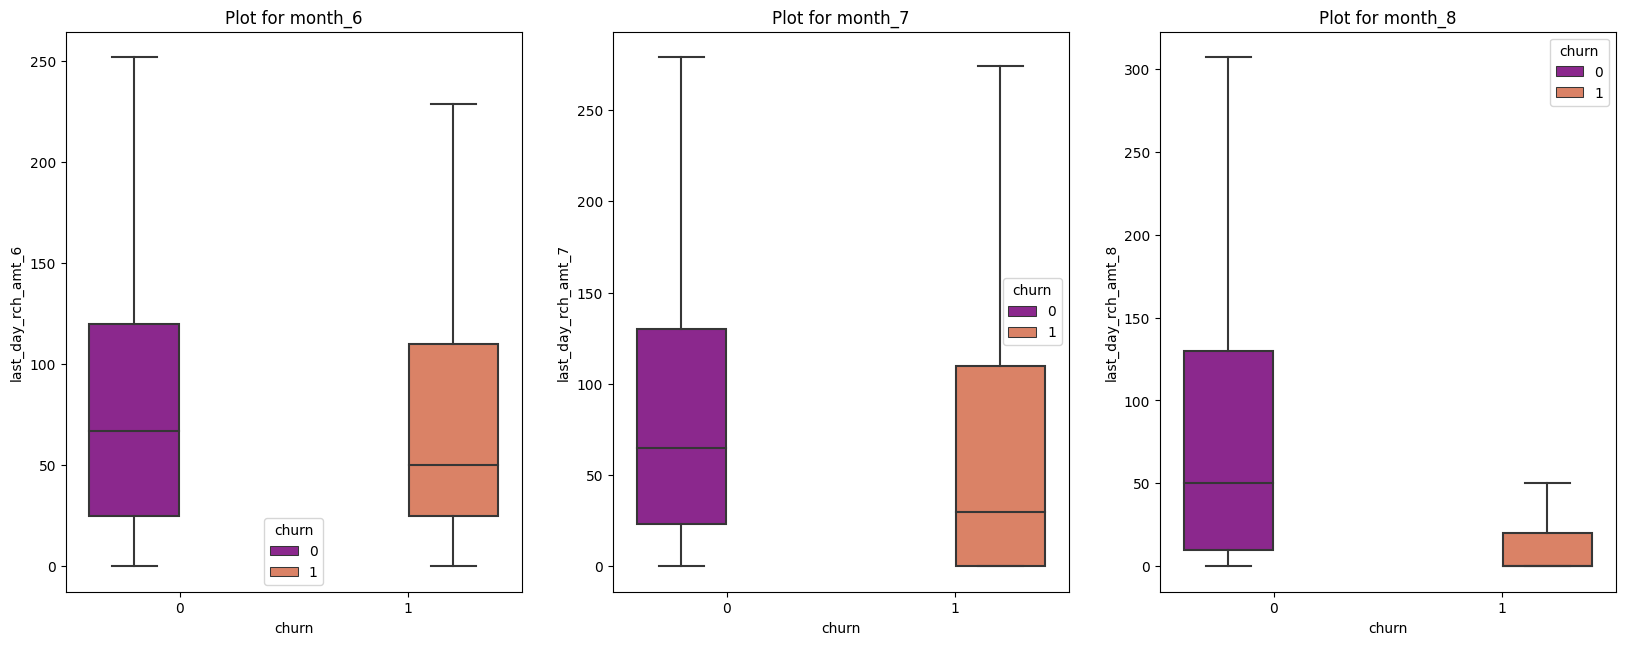

In [53]:
#Getting the last day recharge amount columns

last_day_rech_amt = churn.columns[churn.columns.str.contains('day')]

# Ploting for last day recharge amount:

plot_box_chart('last_day_rch_amt')
plt.show()

We are getting a huge drop in the 8th-month recharge amount for churned customers.

### 2G and 3G usage related attributes

In [54]:
# let's check monthly 2G/3G service schemes

monthly_subcription_2g_3g = churn.columns[churn.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

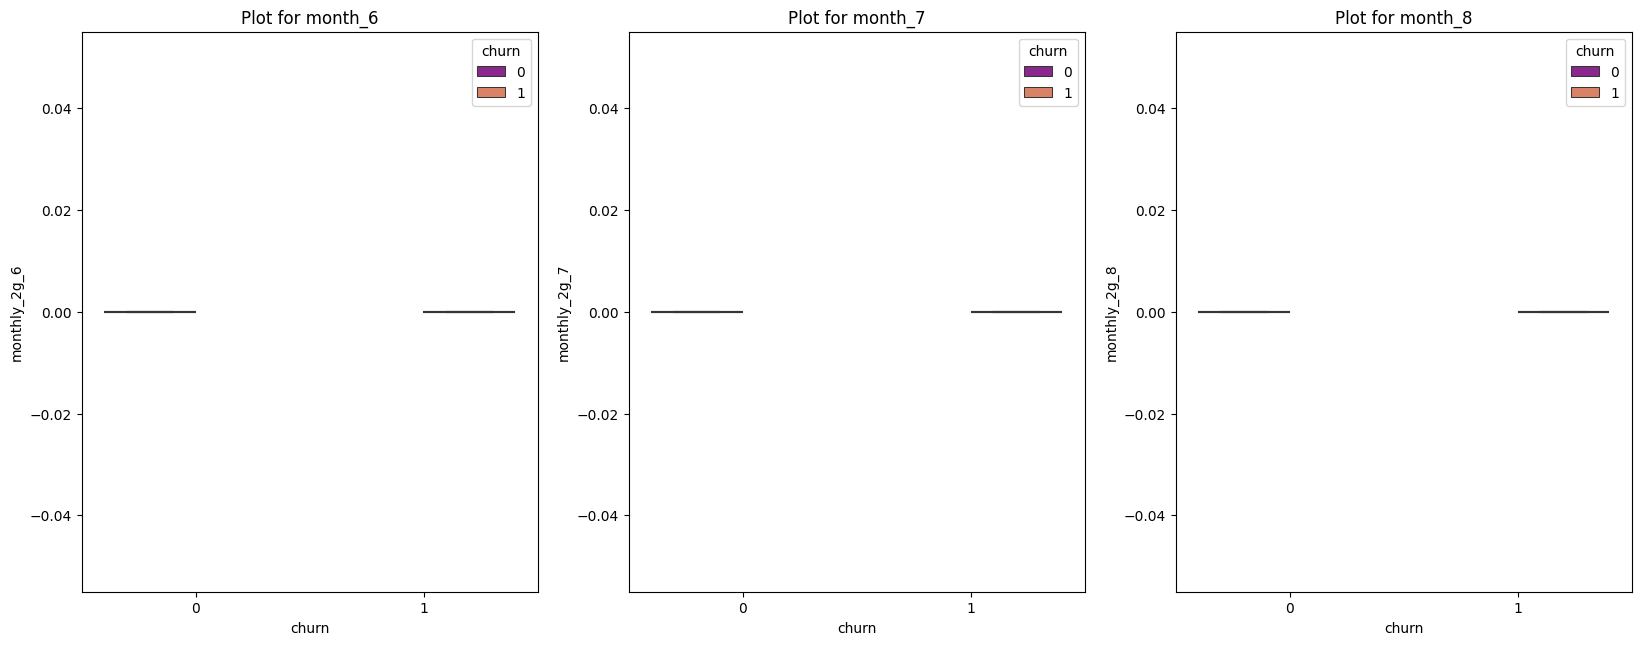

In [55]:
# Ploting for monthly subscription :

plot_box_chart('monthly_2g')

The value range is very low, hence graph is not giving us a proper justification result. Hence doing analysis by checking mean value.

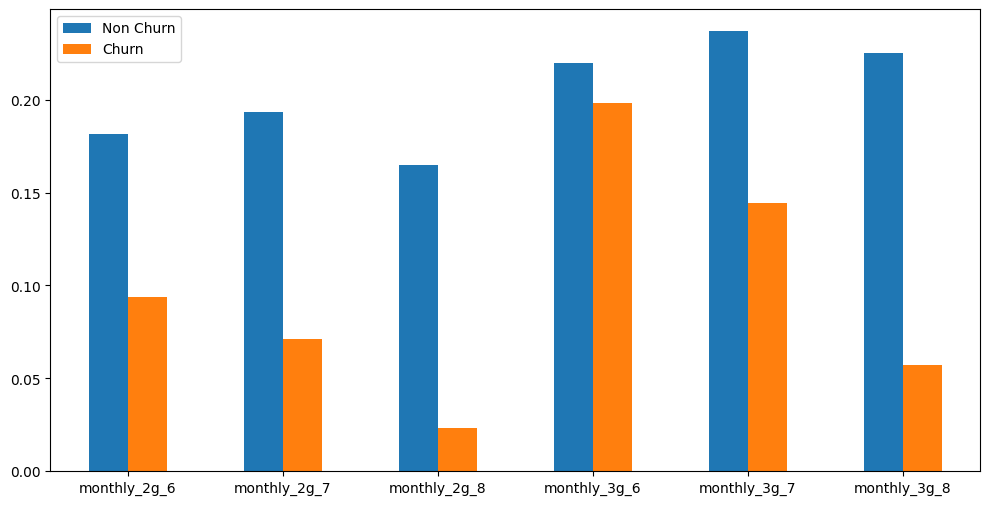

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [56]:
plot_mean_bar_chart(churn, monthly_subcription_2g_3g)

Again we can see a drop in monthly subscriptions for churned customers in the 8th Month.

#### Average Revenue Per User

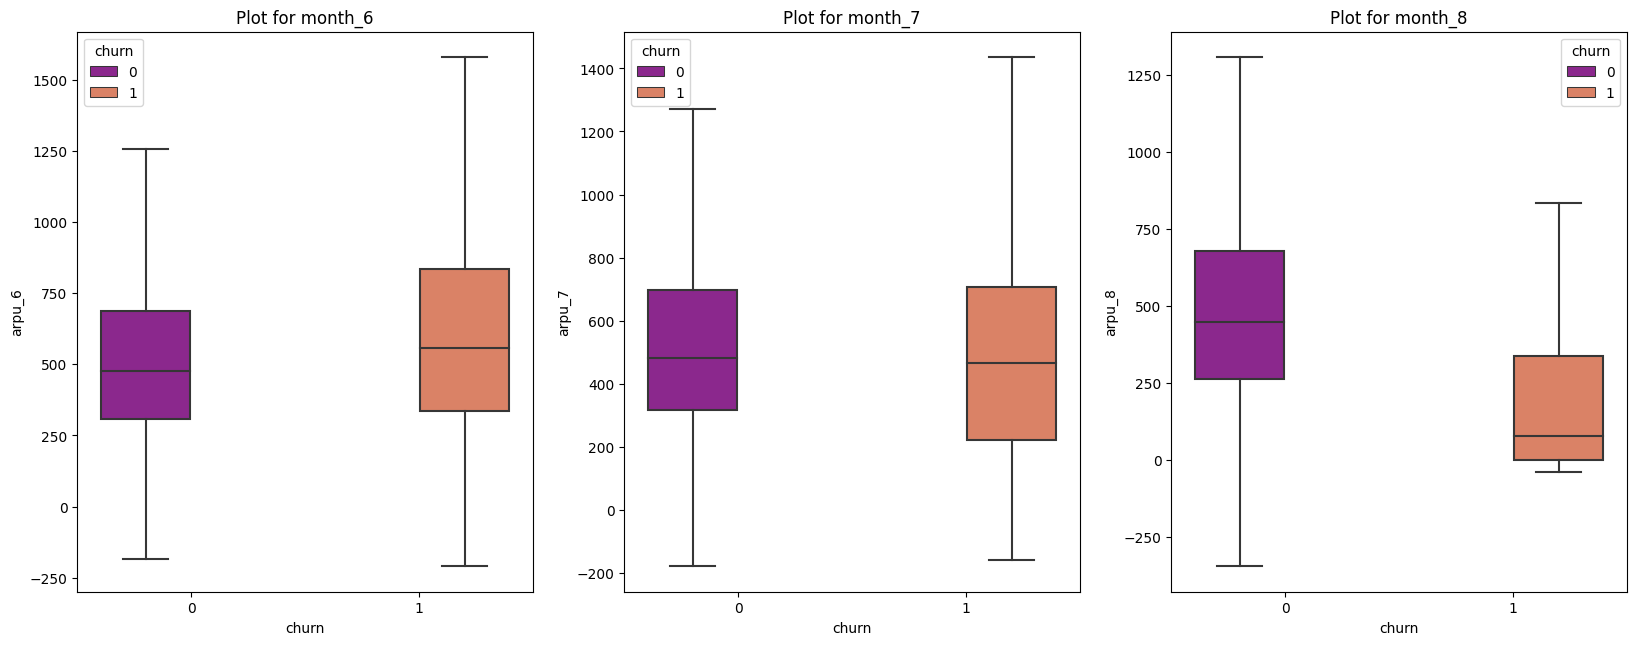

In [57]:
# Checking columns for average revenue per user

arpu_cols = churn.columns[churn.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

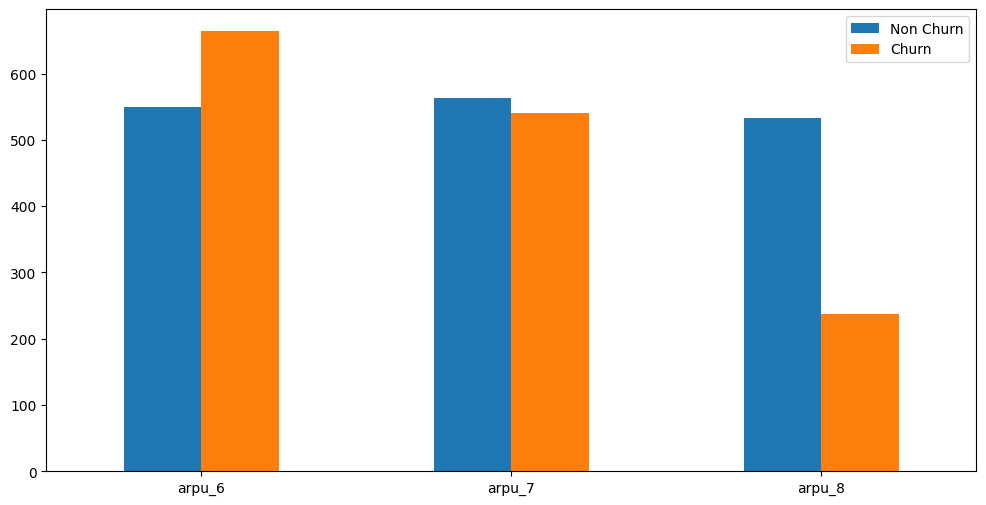

,arpu_6,arpu_7,arpu_8
Non Churn,549.546959,562.929990,532.869746
Churn,663.709368,541.146131,237.655478


In [58]:
plot_mean_bar_chart(churn, arpu_cols)

We can see that huge drops for Arpu in the 8th month for churned customers

#### Minutes of usage - voice calls

In [59]:
mou_cols = churn.columns[churn.columns.str.contains('mou')]

mou_og_cols6 = churn.columns[churn.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [60]:
# Creating a function to generate Heatmap

def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="Greens",annot=True)
    plt.show()

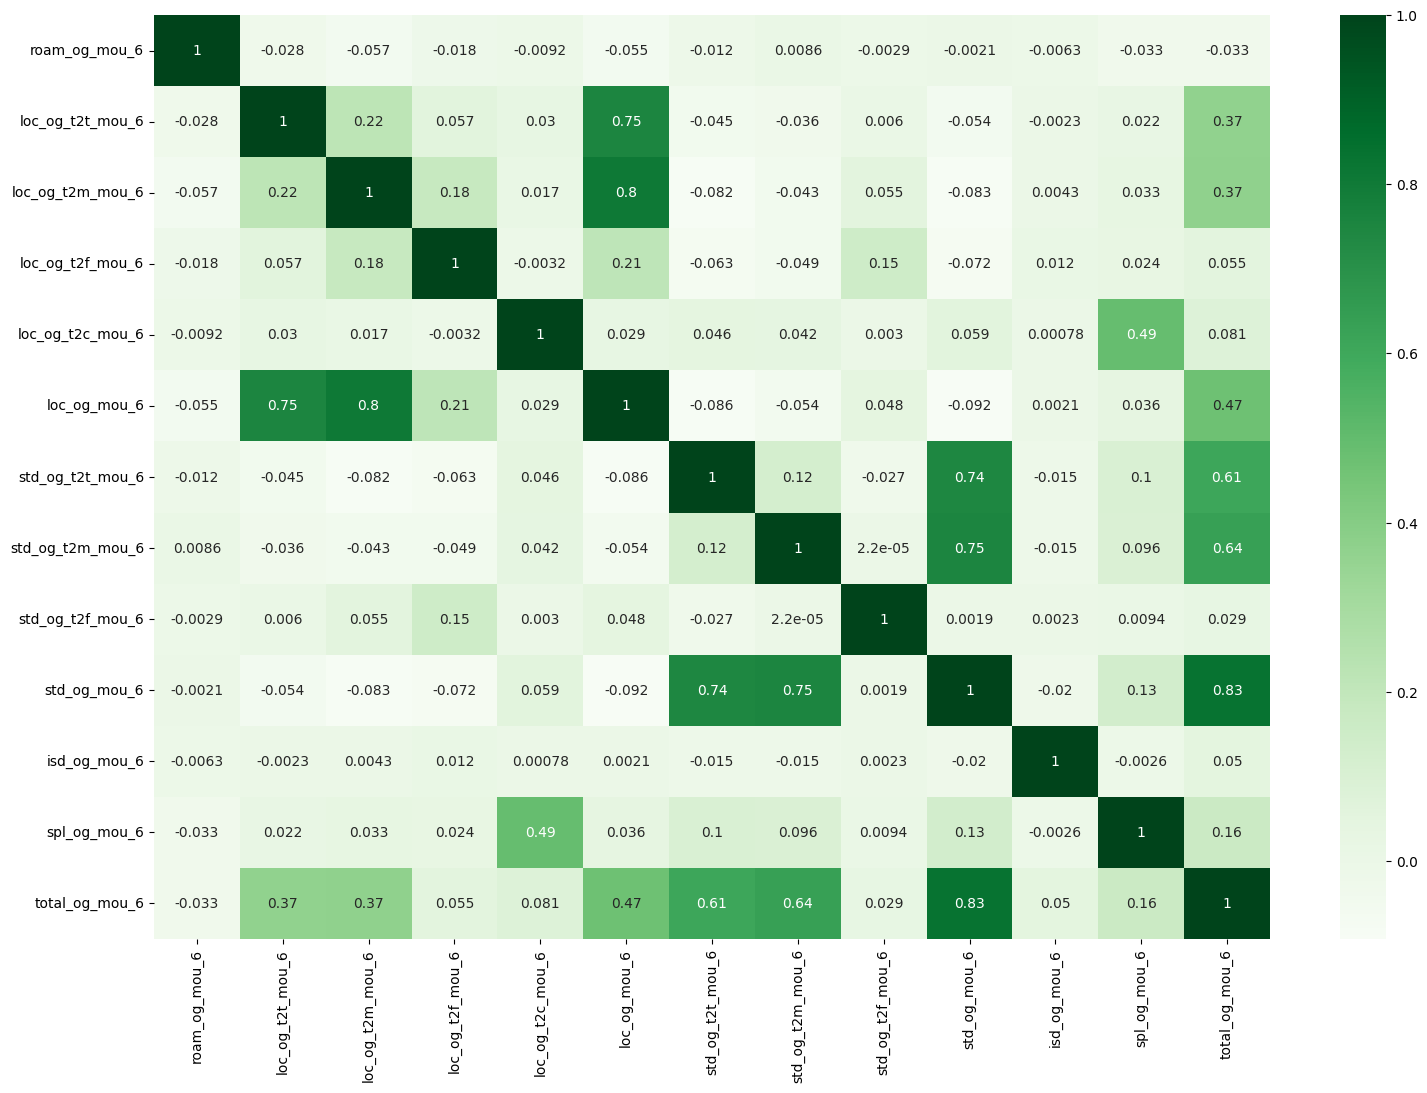

In [61]:
# Creating Heatmap to check coliniearity

heatmap(18,12,churn.filter(mou_og_cols6))

We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seem to have a strong correlation with other fields and they need to be inspected to avoid any multicollinearity issues.

In [62]:
#to check the dependence of columns

print(churn.loc[8,'total_og_mou_6'],"==",churn.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(churn.loc[8,'std_og_mou_6'],"==",churn.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6']].sum())
print(churn.loc[8,'loc_og_mou_6'],"==",churn.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6']].sum())

508.36 == 508.34999999999997
130.26 == 130.25
378.09 == 378.09


We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 are a combination of other variables present in the dataset.So we can remove these columns for all months from the data set.

In [63]:
list_total_og_cols = churn.columns[churn.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
churn.drop(list_total_og_cols,axis=1,inplace=True)
def log(string):
    display(Markdown("> <span style='color:blue'>"+string+"</span>"))
log("Columns dropped - ")
list_total_og_cols.tolist()

> <span style='color:blue'>Columns dropped - </span>

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

#### Checking for incoming mou variables

In [64]:
mou_ic_cols6 = churn.columns[churn.columns.str.contains('.*_ic_.*mou_6',regex=True)]

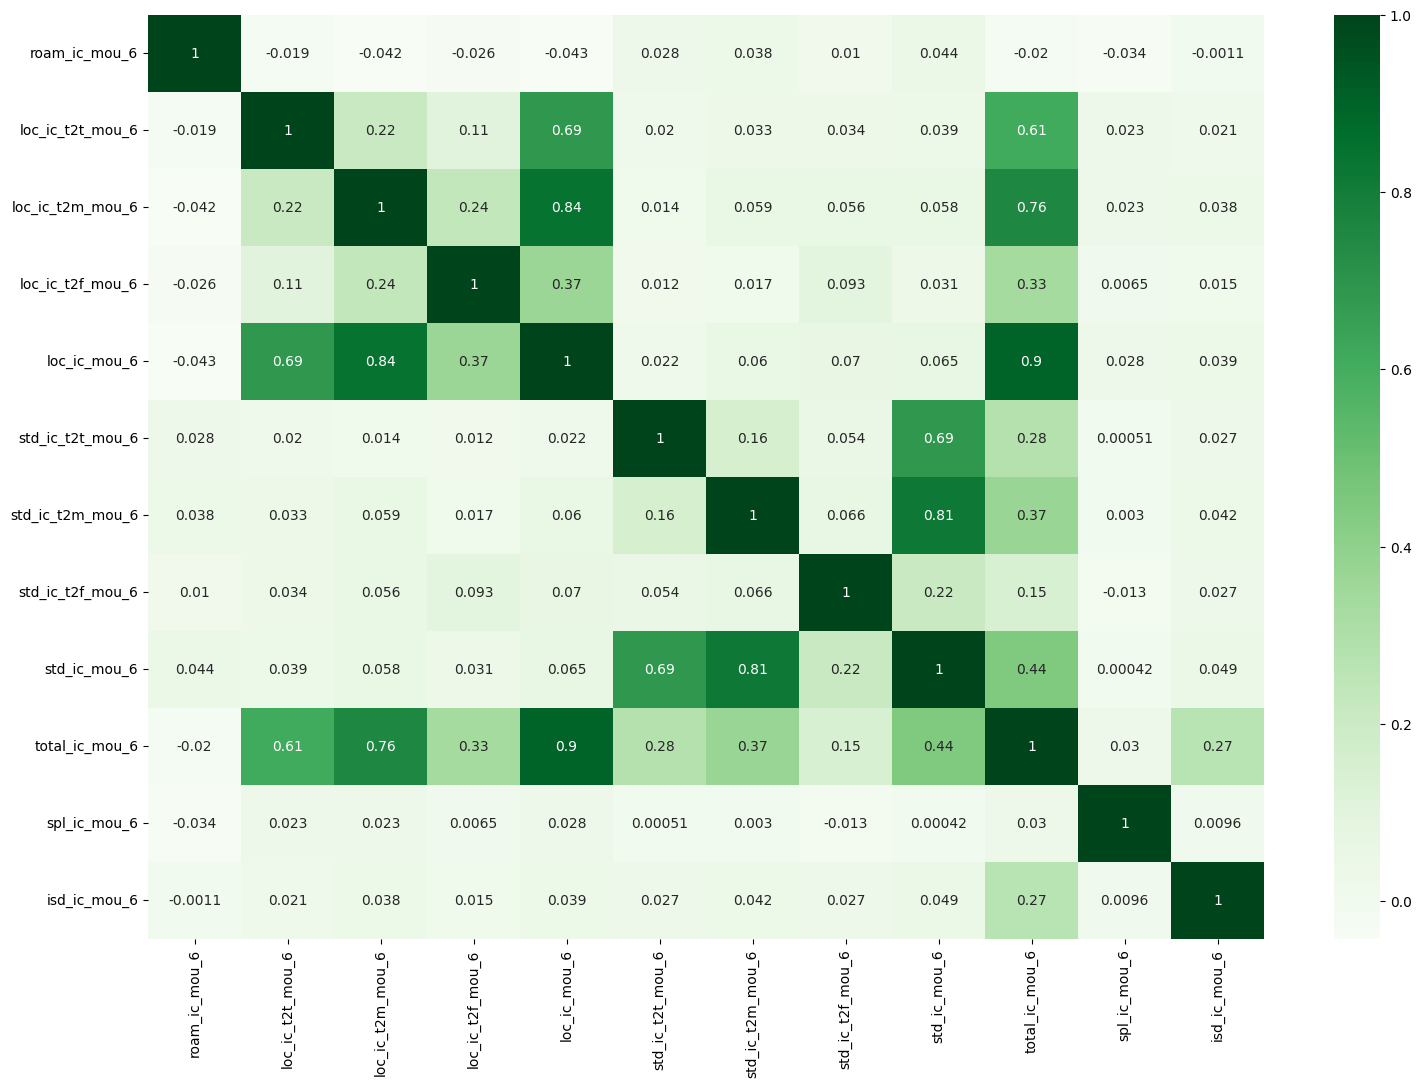

In [65]:
# Creating Heatmap to check coliniearity

heatmap(18,12,churn.filter(mou_ic_cols6))

We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seem to have a strong correlation with other fields and they need to be inspected to avoid any multicollinearity issues.

In [66]:
print(churn.loc[21,'total_ic_mou_6'],"==",churn.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(churn.loc[21,'loc_ic_mou_6'],"==",churn.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())
print(churn.loc[21,'std_ic_mou_6'],"==",churn.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

207.09 == 207.09
125.33 == 125.32000000000001
81.76 == 81.75


We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 are a combination of other variables present in the dataset. So we can remove these columns for all months from the data set

In [67]:
list_total_ic_cols = churn.columns[churn.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
churn.drop(list_total_ic_cols,axis=1,inplace=True)
log("Columns dropped - ")
list_total_ic_cols.tolist()

> <span style='color:blue'>Columns dropped - </span>

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

#### Offnet Usage

In [68]:
offnet_usage_service_col = churn.columns[churn.columns.str.contains('offnet.*mou',regex=True)]

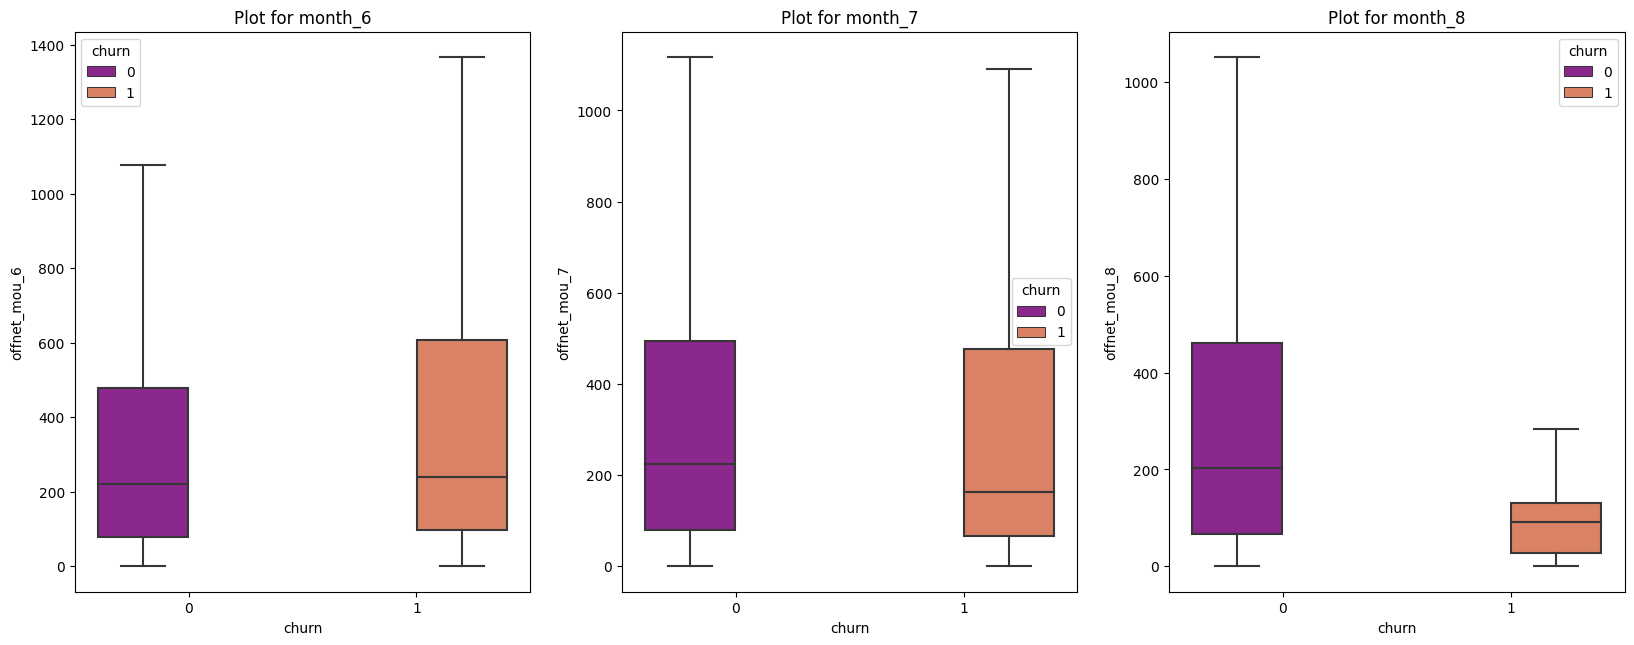

In [69]:
# Offnet mou values for churned and non churned customers

plot_box_chart('offnet_mou')

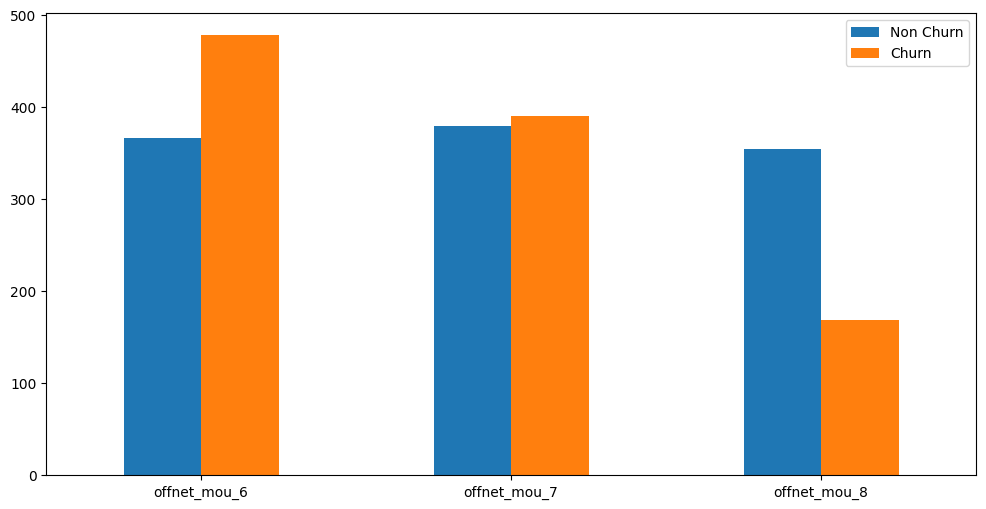

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,366.487934,378.948925,353.773024
Churn,477.967739,390.345980,168.554838


In [70]:
plot_mean_bar_chart(churn, offnet_usage_service_col)

We can see the drop for offset mou services in the 8th month

#### ONNET : All kind of calls within the same operator network

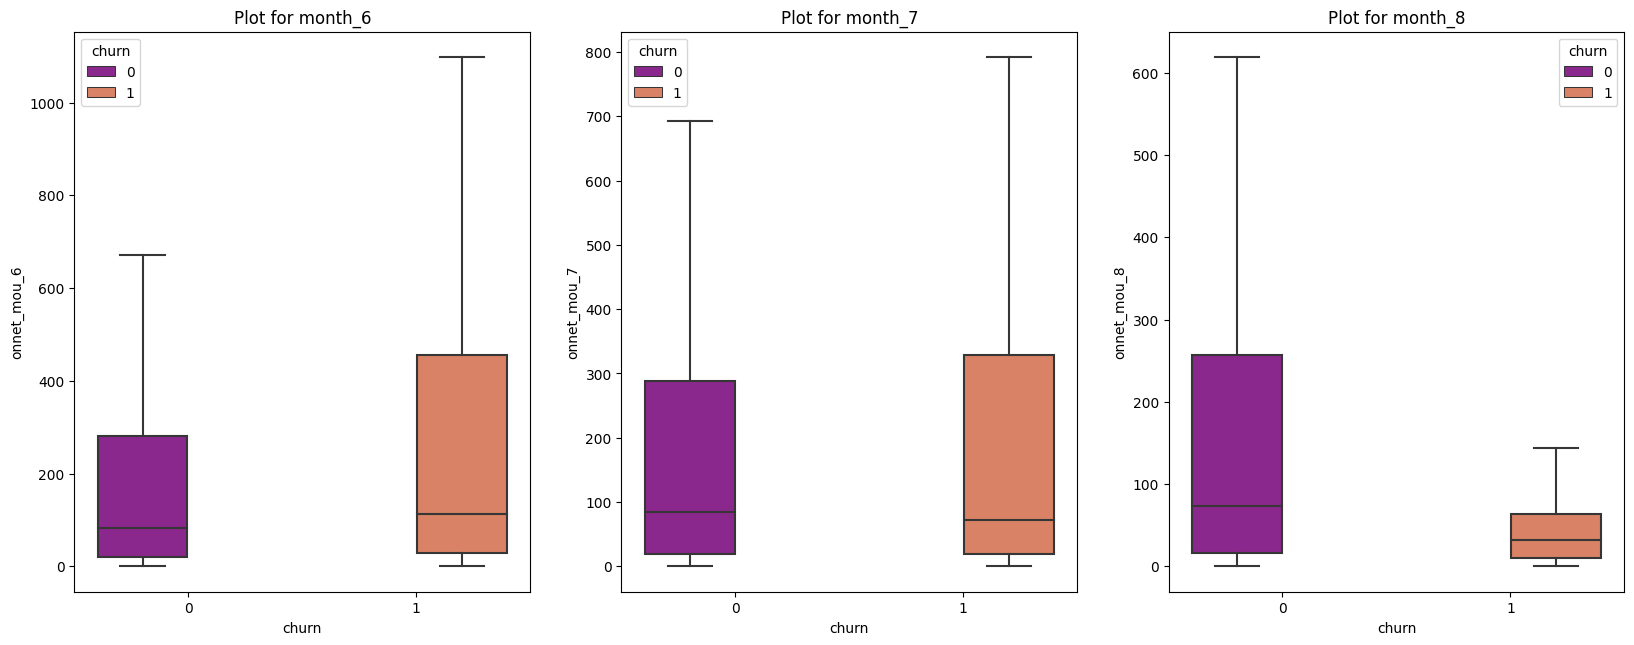

In [71]:
#minutes of usage related columns

onnet_usage_service =  churn.columns[churn.columns.str.contains('^onnet.*mou',regex=True)]

# Plotting onnet
plot_box_chart('onnet_mou')

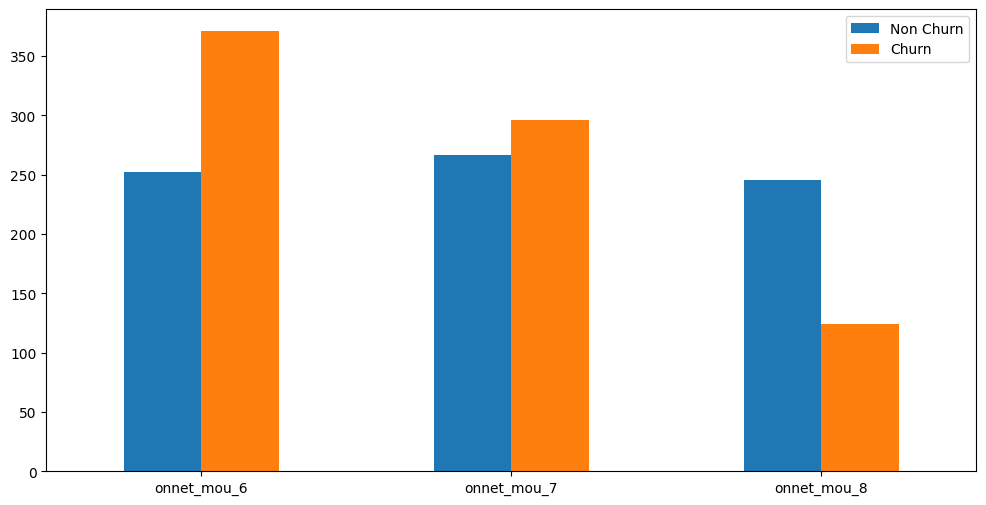

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,251.860341,266.237950,245.476590
Churn,370.802914,295.690259,124.025269


In [72]:
plot_mean_bar_chart(churn, onnet_usage_service)

We also see that there is a drop in Onnet usage in the 8th month for churned customers

### Creating dummies for categorical variables

In [73]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 120 entries, arpu_6 to tenure
dtypes: float64(89), int64(25), object(6)
memory usage: 28.7+ MB


In [74]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',]

In [75]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_feature = pd.get_dummies(churn[cat_cols], drop_first=False)

# Instead of dropping the first variable, dropping the newly created category(-1)
for col in cat_cols:
    dummy_feature.drop(col+"_-1", axis=1,inplace=True)

# Adding the results to the master dataframe
churn = pd.concat([churn, dummy_feature], axis=1)

# Drop the original columns for which dummies have created
churn.drop(cat_cols, axis=1,inplace=True)

churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn,tenure,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1,32.0,1,0,1,0,1,0,0,1,0,1,0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1,27.0,0,0,0,0,0,0,0,0,0,0,0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,154.0,23.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0,10.0,0,0,1,0,1,0,0,0,0,1,0,1
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.680,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.740,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0

### Derive the Custom variables

The most important feature, in this situation, can be the difference between the 8th month and the previous months. <br>
The difference can be in patterns such as usage difference or recharge value difference. <br>
Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [76]:
# create a new column, which would be average  of 6th,7th,8th months

# We will be using string matching by use of regex library
import regex
col_list = churn.filter(regex='_6$|_7$|_8$').columns.str[:-2]
col_list.unique()

print ("Shape before adding derive variables : ",churn.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av678" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    col_8 = col+"_8"
    churn[avg_col_name] = churn[col_8] - ((churn[col_7] + churn[col_8])/ 2)
    
print ("Shape after adding derive variables : ",churn.shape)

Shape before adding derive variables :  (29953, 126)
Shape after adding derive variables :  (29953, 162)


## Treating Outliers
__Cap outliers in all numeric variables with k-sigma technique__

In [77]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [78]:
# List out the numerical columns 
# Removeing the dummy variable which we have created from categorical field and target variable.

numerical_columns = [col for col in churn.columns 
                     if col not in list(list(dummy_feature.columns) 
                                        + ['churn'])]

# cap outliers in the numeric columns
churn[numerical_columns] = churn[numerical_columns].apply(cap_outliers, axis=0)

In [79]:
#Taking a backup of dataset for later use
master_df = churn.copy()

In [80]:
churn['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

# Model Building

### Handle Class Imbalance of target variable

Since the churn rate is about less than 10% in the overall dataset, we will apply the class balancing technique to handle the imbalance.

In [81]:
X = churn.drop("churn", axis = 1)
Y = churn['churn']

# Applying ADASYN technique to handle class imbalance
adasyn = ADASYN(random_state=42)
X, Y = adasyn.fit_resample(X, Y)

In [82]:
# Checking if the Variables are balanced or not

Y.value_counts()

0    27520
1    27258
Name: churn, dtype: int64

The target column is balanced now.

### Train and Test split

In [83]:
# divide data into train and test with 80:20 Ratio

y=Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify = y)

# print shapes of train and test sets

print("X train shape : {} | y train shape : {}".format(X_train.shape, y_train.shape))
print("X test shape : {} | y test shape : {}".format(X_test.shape, y_test.shape))

X train shape : (43822, 161) | y train shape : (43822,)
X test shape : (10956, 161) | y test shape : (10956,)


In [84]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(43822,)
(10956, 161)
(10956,)


### PCA :

In [85]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [86]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
variance_ratio = pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)
print(variance_ratio)

0        8.75
1       16.17
2       20.56
3       24.39
4       28.08
5       31.11
6       33.66
7       36.04
8       38.34
9       40.41
10      42.36
11      44.15
12      45.89
13      47.53
14      49.08
15      50.58
16      52.05
17      53.41
18      54.72
19      55.96
20      57.19
21      58.36
22      59.50
23      60.63
24      61.73
25      62.81
26      63.87
27      64.88
28      65.87
29      66.83
30      67.78
31      68.71
32      69.62
33      70.52
34      71.38
35      72.21
36      73.02
37      73.82
38      74.58
39      75.34
40      76.06
41      76.77
42      77.46
43      78.14
44      78.81
45      79.47
46      80.10
47      80.72
48      81.32
49      81.93
50      82.51
51      83.08
52      83.65
53      84.19
54      84.72
55      85.23
56      85.74
57      86.24
58      86.73
59      87.20
60      87.66
61      88.11
62      88.55
63      88.97
64      89.38
65      89.79
66      90.18
67      90.55
68      90.92
69      91.28
70      91.62
71    

In [87]:
# look at PCA components

pca.components_

array([[-8.57742385e-02, -7.97209992e-02,  8.09077200e-03, ...,
        -1.91362308e-02, -2.05831263e-02, -3.14705720e-02],
       [ 1.47842461e-01,  1.77241236e-01,  2.25037470e-01, ...,
         2.41591914e-02,  4.65368725e-02,  6.70209552e-02],
       [ 6.23576277e-02,  9.33677690e-02, -1.28604197e-01, ...,
        -1.36208687e-01, -5.46933134e-02, -1.08000989e-01],
       ...,
       [ 2.03467017e-02,  3.68684561e-01, -4.22593842e-01, ...,
         5.64975265e-03,  1.53946862e-05,  2.18970515e-04],
       [ 5.54923335e-03,  1.08282507e-02, -1.00186275e-02, ...,
         4.12349534e-03,  1.37839681e-03, -1.27120053e-03],
       [-3.94542582e-03,  6.69850042e-02, -8.18215326e-02, ...,
         1.22442994e-04,  1.25840476e-04, -1.32022060e-03]])

In [88]:
# look at explainded variance of PCA components

pca.explained_variance_ratio_

array([8.75390842e-02, 7.41209855e-02, 4.39688369e-02, 3.82347994e-02,
       3.69494196e-02, 3.02424227e-02, 2.55576795e-02, 2.38356826e-02,
       2.29738068e-02, 2.06491782e-02, 1.95155792e-02, 1.78736118e-02,
       1.74841096e-02, 1.63537688e-02, 1.54769802e-02, 1.50537277e-02,
       1.47091239e-02, 1.36108626e-02, 1.30340568e-02, 1.23954341e-02,
       1.22767905e-02, 1.17000826e-02, 1.14317684e-02, 1.13412774e-02,
       1.09828524e-02, 1.07426376e-02, 1.06225056e-02, 1.00944243e-02,
       9.90497695e-03, 9.58705087e-03, 9.53533771e-03, 9.30212752e-03,
       9.09120070e-03, 9.00603381e-03, 8.55450855e-03, 8.37991377e-03,
       8.07012862e-03, 7.96663253e-03, 7.66423996e-03, 7.53534336e-03,
       7.23267347e-03, 7.11532832e-03, 6.85409374e-03, 6.81932471e-03,
       6.75543807e-03, 6.59152729e-03, 6.27474377e-03, 6.17531908e-03,
       6.05458813e-03, 6.01907978e-03, 5.82377473e-03, 5.72712846e-03,
       5.68068773e-03, 5.43096799e-03, 5.24512916e-03, 5.17297003e-03,
      

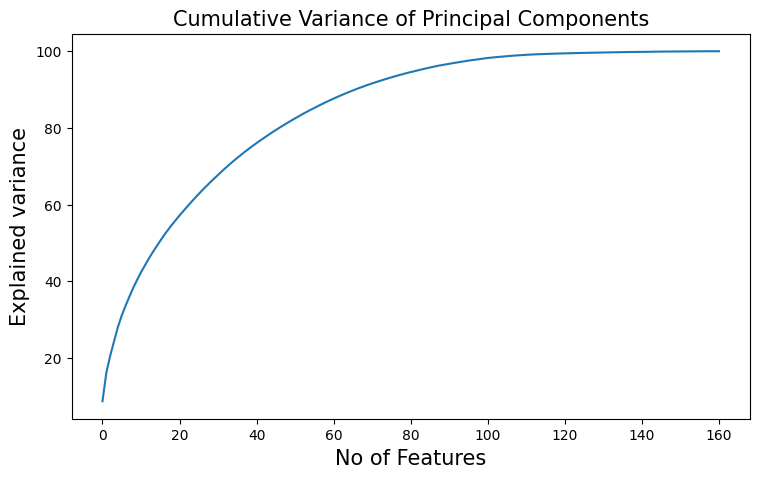

In [89]:
# plot feature variance

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.title("Cumulative Variance of Principal Components",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("No of Features",size=15)
plt.plot(cumulative_variance)
plt.show()

In [90]:
# Creating empty List to store the model scores

model_score_list = []

In [91]:
#Defineing the function for evaluating the model

def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

### Perform the final PCA

In [92]:
# Perform final PCA with 65 components

from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=61)

X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

print("Train PCA data shape : ",X_train_pca.shape)
print("Test PCA data shape : ",X_test_pca.shape)

Train PCA data shape :  (43822, 61)
Test PCA data shape :  (10956, 61)


### Applying logistic regression on the Principal components

In [93]:
# Initialize the Logistic regression

model = LogisticRegression(random_state=42)

# fit the model
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression', 
                        'acc_score':acc_score, 
                        'roc_score':roc_score, 
                        'precision_score':prec_score, 
                        'recall_score':rec_score})

Accuracy Score :  80.63
ROC AUC score :  80.63
Precision score :  80.29
Recall score :  80.94


### Logistic Regression with PCA

In [94]:
# Initialize the Logistic regression

model = LogisticRegression(random_state=42)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the testing pca data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression with PCA',
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  79.55
ROC AUC score :  79.58
Precision score :  76.69
Recall score :  84.65


### Hyperparameter tuning - Logistic Regression with PCA

In [95]:
%%time

# PCA
pca = PCA()

logistic = LogisticRegression()

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 
            'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 
            'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_lr = GridSearchCV(estimator=pca_logistic, 
                            cv=folds, 
                            param_grid=params, 
                            scoring='roc_auc', 
                            n_jobs=-1, verbose=1,
                            return_train_score=True)

# fit model
model_lr.fit(X_train_pca, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: user 5.49 s, sys: 413 ms, total: 5.91 s
Wall time: 6.94 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [96]:
# Let's check the cross validation results

pd.DataFrame(model_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.262708,0.039902,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.085685,0.047444,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.310494,0.033667,0.010601,0.002739,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.870719,0.871321,0.865364,0.871471,0.873235,0.870422,0.002664,8,0.869121,0.872838,0.873796,0.871179,0.872387,0.871864,0.001609
3,0.037559,0.005792,0.000000,0.000000,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.162176,0.020564,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.035721,0.004576,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.246024,0.024100,0.019404,0.009613,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.870728,0.871331,0.865376,0.871474,0.873233,0.870428,0.002661,7,0.869128,0.872848,0.873803,0.871188,0.872397,0.871873,0.001609
7,0.039873,0.005340,0.000000,0.000000,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.215474,0.014681,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.040350,0.006680,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Let's check the best hyperparameters

print("Best AUC: ", model_lr.best_score_)
print("Best hyperparameters: ", model_lr.best_params_)

Best AUC:  0.8704308442040212
Best hyperparameters:  {'logistic__C': 5, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [98]:
# model with optimal hyperparameters

steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=60)),
         ("logistic", LogisticRegression(penalty='l2', random_state=42,C=10))
        ]
pipeline = Pipeline(steps)

# fit model
pipeline.fit(X_train, y_train)

# predict the testing pca data
y_pred = pipeline.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression with PCA (Optimal Hyperparameters)', 
                        'acc_score':acc_score, 
                        'roc_score':roc_score, 
                        'precision_score':prec_score, 
                        'recall_score':rec_score})

Accuracy Score :  81.54
ROC AUC score :  81.55
Precision score :  80.41
Recall score :  83.18


### RandomForest

In [99]:
# initialize the randomforest
model = RandomForestClassifier(random_state=42)

# fit the training data
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 
                        'acc_score':acc_score, 
                        'roc_score':roc_score, 
                        'precision_score':prec_score, 
                        'recall_score':rec_score})

Accuracy Score :  97.17
ROC AUC score :  97.17
Precision score :  96.27
Recall score :  98.11


### RandomForest with PCA

In [100]:
# initialize the randomforest
model = RandomForestClassifier(random_state=42)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier with PCA', 
                        'acc_score':acc_score, 'roc_score':roc_score, 
                        'precision_score':prec_score, 
                        'recall_score':rec_score})

Accuracy Score :  95.84
ROC AUC score :  95.85
Precision score :  94.24
Recall score :  97.6


### Hyperparameter tuning - RandomForest

In [101]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], 'max_depth': range(5, 50, 5), 'min_samples_split': [2, 5, 10] }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_rf = GridSearchCV(estimator=forest, 
                        cv=folds, 
                        param_grid=params, 
                        scoring='roc_auc', 
                        n_jobs=-1, 
                        verbose=1,
                        return_train_score=True)

In [102]:
# fit model
model_rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 50, 5),
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [103]:
scores = model_rf.cv_results_
pd.DataFrame(model_rf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.495007,0.062722,0.129993,0.036420,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.867753,0.868658,0.866267,0.870914,0.868574,0.868433,0.001509,50,0.877575,0.876086,0.878213,0.875282,0.876605,0.876752,0.001043
1,12.461970,1.133912,0.073972,0.020732,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.865575,0.868971,0.866045,0.870670,0.869037,0.868060,0.001941,51,0.875851,0.876324,0.876995,0.877008,0.878004,0.876837,0.000728
2,10.983705,0.167000,0.068325,0.015633,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.869265,0.870853,0.867153,0.871684,0.867010,0.869193,0.001892,49,0.878887,0.878055,0.879339,0.877477,0.875389,0.877829,0.001380
3,18.302882,0.092125,0.068887,0.015686,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.944916,0.942728,0.939365,0.944337,0.942484,0.942766,0.001936,43,0.966428,0.966787,0.966381,0.967055,0.967318,0.966794,0.000360
4,18.850671,0.694517,0.122253,0.038113,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.944187,0.942253,0.938781,0.944995,0.942314,0.942506,0.002145,44,0.966208,0.966337,0.965981,0.967430,0.967792,0.966749,0.000721


In [104]:
# print best hyperparameters

print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9896557800558995
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}


In [105]:
# model with optimal hyperparameters
model = RandomForestClassifier(random_state=42,criterion='entropy',max_depth=35,min_samples_split=2 )

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier with PCA (Optimal Hyperparameters)',
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  95.8
ROC AUC score :  95.81
Precision score :  93.8
Recall score :  98.04


### Decision Tree

In [106]:
# initialize the Decision Tree
model = DecisionTreeClassifier(random_state=42)

# fit the training data
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'DecisionTreeClassifier', 
                            'acc_score':acc_score, 
                            'roc_score':roc_score, 
                            'precision_score':prec_score, 
                            'recall_score':rec_score})

Accuracy Score :  92.55
ROC AUC score :  92.56
Precision score :  91.83
Recall score :  93.34


### Decision Tree with PCA

In [107]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'DecisionTreeClassifier with PCA', 
                            'acc_score':acc_score, 
                            'roc_score':roc_score, 
                            'precision_score':prec_score, 
                            'recall_score':rec_score})

Accuracy Score :  87.16
ROC AUC score :  87.17
Precision score :  84.8
Recall score :  90.39


### Hyperparameter tuning - Decision Tree

In [108]:
%%time
param_dict = {
    "criterion": ['gini','entropy'],
    "max_depth": range(2,10,2),
    "min_samples_split": range(2,10,2),
    "min_samples_leaf": range(1,5) 
}

decision_tree = DecisionTreeClassifier(random_state=42)

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

grid = GridSearchCV(decision_tree, 
                   param_grid=param_dict,
                   cv =folds,
                   verbose=1,
                   n_jobs=-1,
                   scoring='roc_auc',
                   return_train_score=True)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
CPU times: user 2.7 s, sys: 631 ms, total: 3.33 s
Wall time: 1min 46s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2)},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [109]:
# Print best hyperparameters

print("Best AUC: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best AUC:  0.8572678589700997
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [110]:
grid.cv_results_
pd.DataFrame(grid.cv_results_).sort_values('mean_train_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
48,1.566108,0.014552,0.004809,0.002066,gini,8,1,2,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.857657,0.857390,0.858959,0.853865,0.855866,0.856747,0.001745,17,0.889148,0.893295,0.893127,0.887332,0.890612,0.890703,0.002297
49,1.570618,0.023099,0.003889,0.001667,gini,8,1,4,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.857588,0.857642,0.859533,0.853503,0.855866,0.856827,0.002027,14,0.889034,0.893264,0.893097,0.887329,0.890612,0.890667,0.002301
50,1.565915,0.011396,0.003275,0.000157,gini,8,1,6,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.858008,0.857642,0.858879,0.853381,0.855323,0.856646,0.002012,20,0.888955,0.893264,0.893092,0.887288,0.890500,0.890620,0.002323
51,1.570937,0.018250,0.003125,0.000117,gini,8,1,8,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.856954,0.858889,0.858956,0.853114,0.855167,0.856616,0.002241,25,0.888910,0.893159,0.893056,0.887228,0.890316,0.890534,0.002318
52,1.578840,0.019970,0.003112,0.000095,gini,8,2,2,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.857826,0.858551,0.859381,0.853543,0.855687,0.856998,0.002118,9,0.888890,0.893088,0.892958,0.887182,0.890417,0.890507,0.002296
53,1.569033,0.027292,0.003094,0.000063,gini,8,2,4,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.857826,0.858551,0.859381,0.853543,0.855687,0.856998,0.002118,9,0.888890,0.893088,0.892958,0.887182,0.890417,0.890507,0.002296
54,1.573542,0.024712,0.003370,0.000609,gini,8,2,6,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.858210,0.858551,0.858987,0.853466,0.855238,0.856890,0.002161,13,0.888854,0.893088,0.892992,0.887162,0.890346,0.890488,0.002315
55,1.581101,0.016493,0.004310,0.001888,gini,8,2,8,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.857858,0.858269,0.859064,0.853146,0.855360,0.856739,0.002182,18,0.888787,0.893003,0.892976,0.887102,0.890223,0.890418,0.002320
56,1.606852,0.015607,0.003906,0.001425,gini,8,3,2,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.859085,0.858443,0.858593,0.853945,0.855336,0.857081,0.002051,6,0.888850,0.892952,0.892723,0.887040,0.890217,0.890356,0.002264
57,1.630109,0.027320,0.003806,0.000879,gini,8,3,4,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.859085,0.858443,0.858593,0.853945,0.855336,0.857081,0.002051,6,0.888850,0.892952,0.892723,0.887040,0.890217,0.890356,0.002264


In [111]:
# Model with optimal Hyperparamters
model = DecisionTreeClassifier(criterion='entropy', 
                                max_depth=8, 
                                min_samples_leaf=4, 
                                min_samples_split=2, 
                                random_state=42)

# fit the pca training data
model.fit(X_train, y_train)

# predict the pca testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'DecisionTreeClassifier  with PCA(Optimal Hyperparameter)', 
                            'acc_score':acc_score, 
                            'roc_score':roc_score, 
                            'precision_score':prec_score, 
                            'recall_score':rec_score})

Accuracy Score :  89.7
ROC AUC score :  89.71
Precision score :  89.05
Recall score :  90.43


### KNeighbors classifiers

In [112]:
# initialize the KNeighbors classifiers
model = KNeighborsClassifier()

# fit the training data
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'KNeighborsClassifier', 
                            'acc_score':acc_score, 
                            'roc_score':roc_score, 
                            'precision_score':prec_score, 
                            'recall_score':rec_score})

Accuracy Score :  89.09
ROC AUC score :  89.14
Precision score :  82.07
Recall score :  99.91


### KNeighbors classifiers with PCA

In [113]:
# initialize the KNeighbors classifiers
model = KNeighborsClassifier()

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'KNeighborsClassifier with PCA', 
                            'acc_score':acc_score, 
                            'roc_score':roc_score, 
                            'precision_score':prec_score, 
                            'recall_score':rec_score})

Accuracy Score :  89.14
ROC AUC score :  89.19
Precision score :  82.14
Recall score :  99.89


### Hyperparameter tuning - KNeighbors classifiers

In [114]:
# Define Hyperparameters that we want to tune.
hyperparameters = dict(leaf_size=[20,30,40],
                       n_neighbors= [5,10,15],
                       p=[1, 2])

# Create new KNN object
knn_2 = KNeighborsClassifier()

# Create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Use GridSearch
clf = GridSearchCV(estimator=knn_2,
                   param_grid=hyperparameters,
                   cv=folds,
                   verbose=1,
                   n_jobs=-1,
                   scoring='roc_auc',
                   return_train_score=True)

In [115]:
# Fit the model
knn_model = clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [116]:
# print best hyperparameters

print("Best AUC: ", knn_model.best_score_)
print("Best hyperparameters: ", knn_model.best_params_)

Best AUC:  0.9633875187371437
Best hyperparameters:  {'leaf_size': 20, 'n_neighbors': 10, 'p': 1}


In [117]:
# Model with optimal Hyperparamters
model = KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'KNeighborsClassifier with PCA(Optimal Hyperparameter)', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  87.95
ROC AUC score :  88.01
Precision score :  80.54
Recall score :  99.93


### AdaBoost

In [118]:
# initialize the AdaBoost
model = AdaBoostClassifier(random_state=42)

# fit the training data
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'AdaBoostClassifier', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  90.88
ROC AUC score :  90.88
Precision score :  91.19
Recall score :  90.41


### AdaBoost with PCA

In [119]:
# initialize the AdaBoost
model = AdaBoostClassifier(random_state=42)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'AdaBoostClassifier with PCA', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  78.87
ROC AUC score :  78.88
Precision score :  78.11
Recall score :  79.93


### RidgeClassifier

In [120]:
# initialize the Ridge Classifier
model = RidgeClassifier(class_weight='balanced', random_state=42)

# fit the model on training data
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'RidgeClassifier', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  83.46
ROC AUC score :  83.47
Precision score :  81.58
Recall score :  86.24


### RidgeClassifier with PCA

In [121]:
# initialize the Ridge Classifier
model = RidgeClassifier(class_weight='balanced', random_state=42)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'RidgeClassifier with PCA', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  79.36
ROC AUC score :  79.38
Precision score :  77.34
Recall score :  82.78


### GradientBoosting

In [122]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=42)

# fit the model on training data
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'GradientBoostingClassifier', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  93.12
ROC AUC score :  93.12
Precision score :  92.96
Recall score :  93.23


### GradientBoosting with PCA

In [123]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=42)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'GradientBoostingClassifier with PCA', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  83.16
ROC AUC score :  83.16
Precision score :  82.38
Recall score :  84.15


### SVC

In [124]:
# initialize the SVC rbf kernel
model = SVC(kernel='rbf', random_state=42)

# fit the model on training data
model.fit(X_train, y_train)

# predict the testing data
y_pred = model.predict(X_test)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'SVC_Kernel_rbf', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  85.59
ROC AUC score :  85.59
Precision score :  84.61
Recall score :  86.83


### SVC with PCA

In [125]:
# initialize the SVC rbf kernel
model = SVC(kernel='rbf', random_state=42)

# fit the pca training data
model.fit(X_train_pca, y_train)

# predict the pca testing data
y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'SVC_Kernel_rbf with PCA', 
                         'acc_score':acc_score, 
                         'roc_score':roc_score, 
                         'precision_score':prec_score, 
                         'recall_score':rec_score})

Accuracy Score :  86.67
ROC AUC score :  86.68
Precision score :  85.29
Recall score :  88.48


### Model Comparison

In [126]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 
                                                        'acc_score', 
                                                        'roc_score',
                                                        'precision_score',
                                                        'recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
11,KNeighborsClassifier with PCA(Optimal Hyperpar...,87.95,88.01,80.54,99.93
9,KNeighborsClassifier,89.09,89.14,82.07,99.91
10,KNeighborsClassifier with PCA,89.14,89.19,82.14,99.89
3,RandomForestClassifier,97.17,97.17,96.27,98.11
5,RandomForestClassifier with PCA (Optimal Hyper...,95.80,95.81,93.80,98.04
4,RandomForestClassifier with PCA,95.84,95.85,94.24,97.60
6,DecisionTreeClassifier,92.55,92.56,91.83,93.34
16,GradientBoostingClassifier,93.12,93.12,92.96,93.23
8,DecisionTreeClassifier with PCA(Optimal Hyper...,89.70,89.71,89.05,90.43
12,AdaBoostClassifier,90.88,90.88,91.19,90.41


### Insight : 
- As the False Negative error (Customer which are identified as not churn who are actually going to churn) is costly so comparaing these models based on the recall. But Not just recall but Precision also to be high because if precision is low we will going to provide offers to wrong customers

Based on the above results we can choose the best model which has high precision as well as recall along with high Accuracy score as well .<br>
Model for high performance is <b> RandomForestClassifier </b> with **accuracy of 96.60% , Precison of 95.39% and recall of 98.03%.**

# Interpretable Model

### Logistic regression without PCA

Important Variables thats drives Churn in Telecom Industry
Building Second Model for important predictor attributes

For predicting the important feature best model we choose Simple Logistic Regression 
RFE need to apply for Feature reduction before applying Logistic model and then we will reduce feature by checking VIFs.

In [127]:
# Apply scaling on the train and test data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [128]:
# Converting X_train_scaled & X_test_scaled to dataframe

X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [129]:
%%time
# Instantiateing the Model
logreg = LogisticRegression()

# Applying RFE on Logistic Regression

rfe = RFE(logreg, n_features_to_select=20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

CPU times: user 12min 7s, sys: 51.6 s, total: 12min 58s
Wall time: 1min 54s


In [130]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 134),
 ('arpu_7', True, 1),
 ('arpu_8', False, 39),
 ('onnet_mou_6', False, 114),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 137),
 ('offnet_mou_6', False, 115),
 ('offnet_mou_7', False, 66),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 138),
 ('roam_ic_mou_7', False, 87),
 ('roam_ic_mou_8', False, 86),
 ('roam_og_mou_6', False, 82),
 ('roam_og_mou_7', False, 22),
 ('roam_og_mou_8', False, 21),
 ('loc_og_t2t_mou_6', False, 121),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 125),
 ('loc_og_t2m_mou_6', False, 78),
 ('loc_og_t2m_mou_7', False, 72),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 120),
 ('loc_og_t2f_mou_7', False, 4),
 ('loc_og_t2f_mou_8', False, 6),
 ('loc_og_t2c_mou_6', False, 96),
 ('loc_og_t2c_mou_7', False, 119),
 ('loc_og_t2c_mou_8', False, 95),
 ('std_og_t2t_mou_6', False, 105),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 90),
 ('std_og_t2m_mou_6', False, 83),
 ('std_og_t2m_mou_7', Fal

In [131]:
#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_6', 'max_rech_data_8',
       'sachet_2g_6', 'sep_vbc_3g', 'night_pck_user_6_0.0', 'fb_user_8_1.0',
       'avg_onnet_mou_av678', 'avg_loc_og_t2t_mou_av678',
       'avg_std_og_t2t_mou_av678'],
      dtype='object')

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

### Model: 1

In [132]:
# Building Model 1

X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43801
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18167.
Date:                Tue, 14 Feb 2023   Deviance:                       36334.
Time:                        02:09:12   Pearson chi2:                 6.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4272
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2847      0.016    -18.360      0.000      -0.315      -0.254
arpu_7                       0.3714      0.020     18.769      0.000       0.333       0.410
onnet_mou_7                  0.8109      0.088      9.181      0.000       0.638       0.984
offnet_mou_8                 0.8111      0.064     12.661      0.000       0.686       0.937
loc_og_t2t_mou_7            -0.7961      0.044    -18.266      0.000      -0.881      -0.711
loc_og_t2m_mou_8            -0.8895      0.041    -21.722      0.000      -0.970      -0.809
std_og_t2t_mou_7            -1.0698      0.083    -12.898      0.000      -1.232      -0.907
std_og_t2m_mou_8            -0.8517      0.053    -16.202      0.000      -0.955      -0.749
loc_ic_t2m_mou_8            -0.4997      0.026    -19.487      0.000      -0.550      -0.449
spl_ic_mou_8                -0.3753      0.019    -20.266      0.000      -0.412      -0.339
total_rech_num_8            -0.4485      0.018    -24.761      0.000      -0.484      -0.413
last_day_rch_amt_8          -0.5480      0.016    -34.198      0.000      -0.579      -0.517
max_rech_data_6              0.4926      0.024     20.244      0.000       0.445       0.540
max_rech_data_8              0.2608      0.025     10.325      0.000       0.211       0.310
sachet_2g_6                  0.4281      0.019     22.758      0.000       0.391       0.465
sep_vbc_3g                  -0.6567      0.045    -14.515      0.000      -0.745      -0.568
night_pck_user_6_0.0        -0.6018      0.024    -24.593      0.000      -0.650      -0.554
fb_user_8_1.0               -1.1547      0.025    -46.578      0.000      -1.203      -1.106
avg_onnet_mou_av678          0.7391      0.076      9.670      0.000       0.589       0.889
avg_loc_og_t2t_mou_av678    -0.6827      0.036    -19.082      0.000      -0.753      -0.613
avg_std_og_t2t_mou_av678    -0.9277      0.071    -13.156      0.000      -1.066      -0.790
============================================================================================
"""

In [133]:
# Function to calculate VIF of variables

def Calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [134]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[col])

,Features,VIF
1,onnet_mou_7,32.42
5,std_og_t2t_mou_7,28.86
17,avg_onnet_mou_av678,24.00
19,avg_std_og_t2t_mou_av678,20.61
2,offnet_mou_8,15.23
6,std_og_t2m_mou_8,10.39
3,loc_og_t2t_mou_7,6.17
4,loc_og_t2m_mou_8,5.88
18,avg_loc_og_t2t_mou_av678,3.99
12,max_rech_data_8,3.32


### Model: 2

In [135]:
# Dropping the column with high VIF (onnet_mou_7) and creating model again

col = col.drop('onnet_mou_7', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43802
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18210.
Date:                Tue, 14 Feb 2023   Deviance:                       36421.
Time:                        02:09:14   Pearson chi2:                 6.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4260
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2881      0.016    -18.578      0.000      -0.318      -0.258
arpu_7                       0.3905      0.020     19.799      0.000       0.352       0.429
offnet_mou_8                 0.9209      0.063     14.596      0.000       0.797       1.045
loc_og_t2t_mou_7            -0.4943      0.028    -17.890      0.000      -0.548      -0.440
loc_og_t2m_mou_8            -0.9745      0.040    -24.230      0.000      -1.053      -0.896
std_og_t2t_mou_7            -0.3287      0.019    -17.748      0.000      -0.365      -0.292
std_og_t2m_mou_8            -0.9575      0.051    -18.614      0.000      -1.058      -0.857
loc_ic_t2m_mou_8            -0.5127      0.026    -19.923      0.000      -0.563      -0.462
spl_ic_mou_8                -0.3792      0.019    -20.461      0.000      -0.416      -0.343
total_rech_num_8            -0.4348      0.018    -24.167      0.000      -0.470      -0.400
last_day_rch_amt_8          -0.5430      0.016    -34.025      0.000      -0.574      -0.512
max_rech_data_6              0.4957      0.024     20.393      0.000       0.448       0.543
max_rech_data_8              0.2574      0.025     10.199      0.000       0.208       0.307
sachet_2g_6                  0.4282      0.019     22.803      0.000       0.391       0.465
sep_vbc_3g                  -0.6610      0.045    -14.565      0.000      -0.750      -0.572
night_pck_user_6_0.0        -0.6004      0.024    -24.566      0.000      -0.648      -0.553
fb_user_8_1.0               -1.1593      0.025    -46.807      0.000      -1.208      -1.111
avg_onnet_mou_av678          0.3799      0.063      6.052      0.000       0.257       0.503
avg_loc_og_t2t_mou_av678    -0.5688      0.033    -17.425      0.000      -0.633      -0.505
avg_std_og_t2t_mou_av678    -0.6018      0.058    -10.294      0.000      -0.716      -0.487
============================================================================================
"""

In [136]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[col])

,Features,VIF
16,avg_onnet_mou_av678,20.13
18,avg_std_og_t2t_mou_av678,17.43
1,offnet_mou_8,14.74
5,std_og_t2m_mou_8,9.91
3,loc_og_t2m_mou_8,5.58
17,avg_loc_og_t2t_mou_av678,3.56
11,max_rech_data_8,3.32
14,night_pck_user_6_0.0,3.22
15,fb_user_8_1.0,3.05
10,max_rech_data_6,2.97


### Model: 3

In [137]:
# Dropping the column with high VIF (avg_onnet_mou_av678) and creating model again

col = col.drop('avg_onnet_mou_av678', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43803
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18229.
Date:                Tue, 14 Feb 2023   Deviance:                       36458.
Time:                        02:09:15   Pearson chi2:                 6.19e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4255
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2885      0.015    -18.616      0.000      -0.319      -0.258
arpu_7                       0.3772      0.020     19.277      0.000       0.339       0.416
offnet_mou_8                 0.9641      0.063     15.406      0.000       0.841       1.087
loc_og_t2t_mou_7            -0.5157      0.028    -18.480      0.000      -0.570      -0.461
loc_og_t2m_mou_8            -0.9897      0.040    -24.666      0.000      -1.068      -0.911
std_og_t2t_mou_7            -0.3248      0.019    -17.539      0.000      -0.361      -0.288
std_og_t2m_mou_8            -0.9914      0.051    -19.409      0.000      -1.092      -0.891
loc_ic_t2m_mou_8            -0.5099      0.026    -19.855      0.000      -0.560      -0.460
spl_ic_mou_8                -0.3803      0.019    -20.540      0.000      -0.417      -0.344
total_rech_num_8            -0.4271      0.018    -23.873      0.000      -0.462      -0.392
last_day_rch_amt_8          -0.5397      0.016    -33.871      0.000      -0.571      -0.508
max_rech_data_6              0.4959      0.024     20.399      0.000       0.448       0.543
max_rech_data_8              0.2584      0.025     10.244      0.000       0.209       0.308
sachet_2g_6                  0.4271      0.019     22.759      0.000       0.390       0.464
sep_vbc_3g                  -0.6588      0.045    -14.557      0.000      -0.748      -0.570
night_pck_user_6_0.0        -0.5983      0.024    -24.494      0.000      -0.646      -0.550
fb_user_8_1.0               -1.1628      0.025    -46.974      0.000      -1.211      -1.114
avg_loc_og_t2t_mou_av678    -0.4602      0.027    -16.836      0.000      -0.514      -0.407
avg_std_og_t2t_mou_av678    -0.2662      0.018    -14.568      0.000      -0.302      -0.230
============================================================================================
"""

In [138]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[col])

,Features,VIF
1,offnet_mou_8,14.47
5,std_og_t2m_mou_8,9.74
3,loc_og_t2m_mou_8,5.52
11,max_rech_data_8,3.32
14,night_pck_user_6_0.0,3.22
15,fb_user_8_1.0,3.05
10,max_rech_data_6,2.97
4,std_og_t2t_mou_7,2.06
6,loc_ic_t2m_mou_8,1.96
17,avg_std_og_t2t_mou_av678,1.81


### Model: 4

In [139]:
# Dropping the column with high VIF (offnet_mou_8) and creating model again

col = col.drop('offnet_mou_8', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43804
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18359.
Date:                Tue, 14 Feb 2023   Deviance:                       36718.
Time:                        02:09:17   Pearson chi2:                 7.16e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4221
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2967      0.015    -19.182      0.000      -0.327      -0.266
arpu_7                       0.4672      0.019     24.932      0.000       0.430       0.504
loc_og_t2t_mou_7            -0.5404      0.028    -19.318      0.000      -0.595      -0.486
loc_og_t2m_mou_8            -0.5396      0.026    -20.609      0.000      -0.591      -0.488
std_og_t2t_mou_7            -0.3918      0.018    -21.690      0.000      -0.427      -0.356
std_og_t2m_mou_8            -0.2468      0.015    -16.787      0.000      -0.276      -0.218
loc_ic_t2m_mou_8            -0.5470      0.026    -21.051      0.000      -0.598      -0.496
spl_ic_mou_8                -0.3910      0.019    -21.102      0.000      -0.427      -0.355
total_rech_num_8            -0.4048      0.018    -22.987      0.000      -0.439      -0.370
last_day_rch_amt_8          -0.5110      0.016    -32.767      0.000      -0.542      -0.480
max_rech_data_6              0.4958      0.024     20.487      0.000       0.448       0.543
max_rech_data_8              0.2524      0.025     10.057      0.000       0.203       0.302
sachet_2g_6                  0.4255      0.019     22.794      0.000       0.389       0.462
sep_vbc_3g                  -0.6593      0.045    -14.710      0.000      -0.747      -0.571
night_pck_user_6_0.0        -0.5947      0.024    -24.416      0.000      -0.642      -0.547
fb_user_8_1.0               -1.1835      0.025    -48.015      0.000      -1.232      -1.135
avg_loc_og_t2t_mou_av678    -0.4532      0.027    -16.569      0.000      -0.507      -0.400
avg_std_og_t2t_mou_av678    -0.2857      0.018    -15.640      0.000      -0.322      -0.250
============================================================================================
"""

In [140]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[col])

,Features,VIF
10,max_rech_data_8,3.32
13,night_pck_user_6_0.0,3.22
14,fb_user_8_1.0,3.04
9,max_rech_data_6,2.97
2,loc_og_t2m_mou_8,2.20
3,std_og_t2t_mou_7,1.98
5,loc_ic_t2m_mou_8,1.95
16,avg_std_og_t2t_mou_av678,1.80
11,sachet_2g_6,1.73
0,arpu_7,1.67


### Model: 5

In [141]:
# Dropping the column with high VIF (max_rech_data_8) and creating model again

col = col.drop('max_rech_data_8', 1)
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43822
Model:                            GLM   Df Residuals:                    43805
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18410.
Date:                Tue, 14 Feb 2023   Deviance:                       36820.
Time:                        02:09:18   Pearson chi2:                 6.86e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4208
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2905      0.015    -18.819      0.000      -0.321      -0.260
arpu_7                       0.4846      0.019     25.852      0.000       0.448       0.521
loc_og_t2t_mou_7            -0.5403      0.028    -19.314      0.000      -0.595      -0.485
loc_og_t2m_mou_8            -0.5415      0.026    -20.694      0.000      -0.593      -0.490
std_og_t2t_mou_7            -0.3918      0.018    -21.727      0.000      -0.427      -0.356
std_og_t2m_mou_8            -0.2452      0.015    -16.696      0.000      -0.274      -0.216
loc_ic_t2m_mou_8            -0.5511      0.026    -21.208      0.000      -0.602      -0.500
spl_ic_mou_8                -0.3931      0.019    -21.212      0.000      -0.429      -0.357
total_rech_num_8            -0.4172      0.018    -23.805      0.000      -0.452      -0.383
last_day_rch_amt_8          -0.4911      0.016    -31.625      0.000      -0.522      -0.461
max_rech_data_6              0.5890      0.023     25.996      0.000       0.545       0.633
sachet_2g_6                  0.3974      0.018     21.924      0.000       0.362       0.433
sep_vbc_3g                  -0.6678      0.045    -14.825      0.000      -0.756      -0.579
night_pck_user_6_0.0        -0.6196      0.024    -25.617      0.000      -0.667      -0.572
fb_user_8_1.0               -1.0111      0.017    -59.437      0.000      -1.044      -0.978
avg_loc_og_t2t_mou_av678    -0.4498      0.027    -16.451      0.000      -0.503      -0.396
avg_std_og_t2t_mou_av678    -0.2824      0.018    -15.493      0.000      -0.318      -0.247
============================================================================================
"""

In [142]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[col])

,Features,VIF
12,night_pck_user_6_0.0,3.17
9,max_rech_data_6,2.55
2,loc_og_t2m_mou_8,2.20
3,std_og_t2t_mou_7,1.98
5,loc_ic_t2m_mou_8,1.94
15,avg_std_og_t2t_mou_av678,1.80
10,sachet_2g_6,1.71
1,loc_og_t2t_mou_7,1.66
0,arpu_7,1.65
7,total_rech_num_8,1.65


**This model is having P-Value of < 0.05 & the RFE < 5. So we can consider this as our final model.**

In [143]:
# Storing the probabiities to a dataframe

y_train_pred= pd.DataFrame({'Churn_actual':y_train.values,'Churn_Prob': res.predict(X_train_sm)})
y_train_pred.head()

,Churn_actual,Churn_Prob
51763,1,0.218392
831,0,0.008565
8333,0,0.103721
15757,0,0.258150
40767,1,0.362216


In [144]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred.head()

print(accuracy_score(y_train_pred.Churn_actual, y_train_pred.predicted))

0.8134270457760941


In [145]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Churn_actual,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
51763,1,0.218392,0,1,1,1,0,0,0,0,0,0,0
831,0,0.008565,0,1,0,0,0,0,0,0,0,0,0
8333,0,0.103721,0,1,1,0,0,0,0,0,0,0,0
15757,0,0.258150,0,1,1,1,0,0,0,0,0,0,0
40767,1,0.362216,0,1,1,1,1,0,0,0,0,0,0


In [146]:
# Now let's calculate accuracy , sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred.Churn_actual, y_train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.497604  1.000000  0.000000
0.1   0.1  0.673726  0.982757  0.367642
0.2   0.2  0.742709  0.950105  0.537291
0.3   0.3  0.780727  0.910896  0.651799
0.4   0.4  0.800831  0.864441  0.737827
0.5   0.5  0.813427  0.826103  0.800872
0.6   0.6  0.818425  0.782812  0.853697
0.7   0.7  0.808293  0.718472  0.897257
0.8   0.8  0.756424  0.571448  0.939635
0.9   0.9  0.600087  0.213794  0.982694


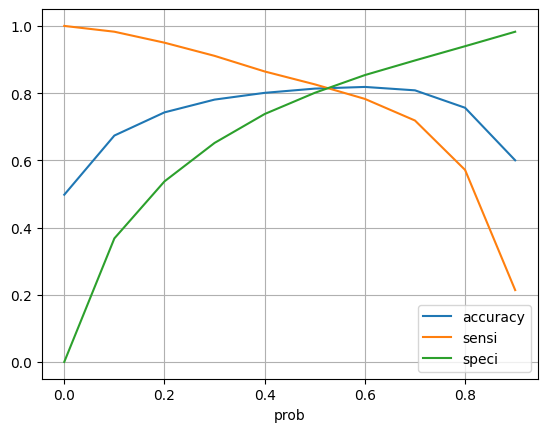

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid("dark_whitegrid")
plt.show()

**The optimal cutoff for accuracy , sensitivity and specificity seems to be 0.6**

In [148]:
# Prediction on train data based on optimul cutoff 

y_train_pred['final_predicted'] = y_train_pred.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)

In [149]:
# Validating evaluation metric on Train data

print("Evaluating model on Train data : ")
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train_pred.Churn_actual, 
                                                             y_train_pred.final_predicted)

Evaluating model on Train data : 
Accuracy Score :  81.84
ROC AUC score :  81.83
Precision score :  84.13
Recall score :  78.28


In [150]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred.Churn_actual, y_train_pred.final_predicted )
print(confusion)

[[18795  3221]
 [ 4736 17070]]


In [151]:
# Let's check the overall accuracy.

print('Accuracy :', round((metrics.accuracy_score(y_train_pred.Churn_actual, 
                                                    y_train_pred.final_predicted))*100,2))

Accuracy : 81.84


### Metrics beyond simply accuracy

In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity : ',round(TN / float(TN+FP),2))

# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  0.78
Specificity :  0.85
False Positive Rate : 0.15
Positive Predictive Value : 0.84
Negative predictive value : 0.8


## ROC CURVE

#### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [154]:
# Function to for ROC

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

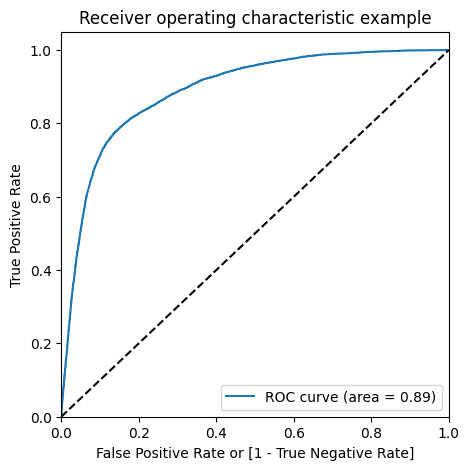

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred.Churn_actual, 
                                            y_train_pred.Churn_Prob, 
                                         drop_intermediate = False )

draw_roc(y_train_pred.Churn_actual, y_train_pred.Churn_Prob)

In [156]:
# Let's create columns with refined probability cutoffs

numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]

for i in numbers:
    y_train_pred[i]= y_train_pred.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Churn_actual,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
51763,1,0.218392,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
831,0,0.008565,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8333,0,0.103721,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15757,0,0.258150,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40767,1,0.362216,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churn_actual, y_train_pred[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.813427     0.826103     0.800872
0.51         0.51  0.814340     0.822342     0.806414
0.52         0.52  0.815641     0.819499     0.811819
0.53         0.53  0.816576     0.815509     0.817633
0.54         0.54  0.817169     0.811290     0.822992
0.55         0.55  0.817466     0.806475     0.828352
0.56         0.56  0.817877     0.801568     0.834030
0.57         0.57  0.818447     0.797395     0.839299
0.58         0.58  0.818607     0.792809     0.844159
0.59         0.59  0.818653     0.787948     0.849064


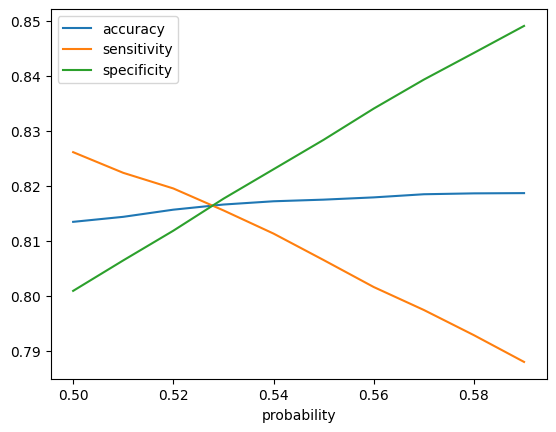

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
# plt.xticks(np.arange(0, 1, 0.1))
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53**

In [188]:
# Prediction on train data based on optimul cutoff 

y_train_pred['final_predicted'] = y_train_pred.Churn_Prob.map( lambda x: 1 if x > 0.53 else 0)

In [189]:
# Validating evaluation metric on Train data

print("Evaluating model on Train data : ")
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_train_pred.Churn_actual, 
                                                             y_train_pred.final_predicted)

Evaluating model on Train data : 
Accuracy Score :  81.66
ROC AUC score :  81.66
Precision score :  81.58
Recall score :  81.55


### Precision and recall tradeoff

In [190]:
from sklearn.metrics import precision_recall_curve

y_train_pred.Churn_actual, y_train_pred.Churn_Prob
p, r, thresholds = precision_recall_curve(y_train_pred.Churn_actual, 
                                            y_train_pred.Churn_Prob)

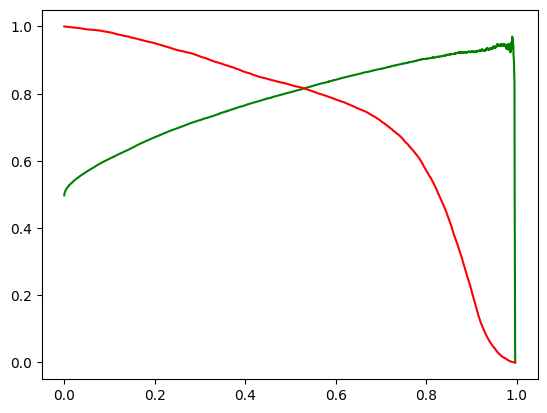

In [191]:
# plotting a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [192]:
# Applying final model on test set

X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

In [215]:
#Prediction on test data based on optimul cutoff 

y_pred_df = pd.DataFrame({'y_test_prob':y_test_pred, 'y_test_actual': y_test})
y_pred_df['final_predicted'] = y_pred_df.y_test_prob.map( lambda x: 1 if x > 0.53 else 0)

In [216]:
# Validating evaluation metric on test data

print("Evaluating model on Test data : ")
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_pred_df.y_test_actual, y_pred_df.final_predicted)

Evaluating model on Test data : 
Accuracy Score :  81.59
ROC AUC score :  81.59
Precision score :  81.37
Recall score :  81.71


In [217]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,arpu_7,loc_og_t2t_mou_7,loc_og_t2m_mou_8,std_og_t2t_mou_7,std_og_t2m_mou_8,loc_ic_t2m_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_6,sachet_2g_6,sep_vbc_3g,night_pck_user_6_0.0,fb_user_8_1.0,avg_loc_og_t2t_mou_av678,avg_std_og_t2t_mou_av678
17870,-0.361508,0.777411,1.068316,-0.505286,-0.431078,0.274231,-0.219266,-0.400992,0.690421,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,1.109324,0.283643
10559,-0.868585,-0.247622,-0.658215,-0.495429,-0.442464,-0.729542,-0.219266,-0.534039,-0.664301,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,-0.281855,0.267052
24056,-0.366304,-0.512665,-0.520679,-0.495711,1.016866,-0.574043,-0.219266,-0.001850,0.690421,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,0.280432,0.267526
38320,1.646765,0.335922,-0.658215,3.545647,-0.442464,-0.729542,-0.219266,-0.767086,-0.664301,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,-1.294632,-3.515275
20388,0.157965,-0.012649,0.667401,-0.506272,-0.442464,0.622788,-0.219266,0.264245,0.377793,0.247990,-0.473212,-0.169694,1.106398,-0.649848,0.177845,0.285302


In [218]:
# Assigning the columns selected by the final model to the X_test 

X_test = X_test[col]
X_test.head()

,arpu_7,loc_og_t2t_mou_7,loc_og_t2m_mou_8,std_og_t2t_mou_7,std_og_t2m_mou_8,loc_ic_t2m_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_6,sachet_2g_6,sep_vbc_3g,night_pck_user_6_0.0,fb_user_8_1.0,avg_loc_og_t2t_mou_av678,avg_std_og_t2t_mou_av678
17870,-0.361508,0.777411,1.068316,-0.505286,-0.431078,0.274231,-0.219266,-0.400992,0.690421,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,1.109324,0.283643
10559,-0.868585,-0.247622,-0.658215,-0.495429,-0.442464,-0.729542,-0.219266,-0.534039,-0.664301,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,-0.281855,0.267052
24056,-0.366304,-0.512665,-0.520679,-0.495711,1.016866,-0.574043,-0.219266,-0.001850,0.690421,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,0.280432,0.267526
38320,1.646765,0.335922,-0.658215,3.545647,-0.442464,-0.729542,-0.219266,-0.767086,-0.664301,-0.716614,-0.473212,-0.169694,-0.903834,-0.649848,-1.294632,-3.515275
20388,0.157965,-0.012649,0.667401,-0.506272,-0.442464,0.622788,-0.219266,0.264245,0.377793,0.247990,-0.473212,-0.169694,1.106398,-0.649848,0.177845,0.285302


In [219]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

17870    0.221663
10559    0.868792
24056    0.649916
38320    0.944358
20388    0.282469
50619    0.550644
35573    0.472444
3372     0.577590
31909    0.639895
45445    0.951716
dtype: float64

In [220]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's check the head of the data
y_pred_1.head()

,0
17870,0.221663
10559,0.868792
24056,0.649916
38320,0.944358
20388,0.282469


In [221]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [222]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [223]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,churn,Prospect ID,0
17870,0,17870,0.221663
10559,1,10559,0.868792
24056,0,24056,0.649916
38320,1,38320,0.944358
20388,0,20388,0.282469


In [224]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,churn,Prospect ID,Converted_prob
17870,0,17870,0.221663
10559,1,10559,0.868792
24056,0,24056,0.649916
38320,1,38320,0.944358
20388,0,20388,0.282469


In [225]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','churn','Converted_prob']]
y_pred_final['churn_predicted'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,churn,Converted_prob,churn_predicted
17870,17870,0,0.221663,22
10559,10559,1,0.868792,87
24056,24056,0,0.649916,65
38320,38320,1,0.944358,94
20388,20388,0,0.282469,28


In [226]:
# Makeing predictions on the test set using 0.53 as the cutoff

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.53 else 0)
y_pred_final.head()

,Prospect ID,churn,Converted_prob,churn_predicted,final_Predicted
17870,17870,0,0.221663,22,0
10559,10559,1,0.868792,87,1
24056,24056,0,0.649916,65,1
38320,38320,1,0.944358,94,1
20388,20388,0,0.282469,28,0


In [227]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_Predicted)

0.8158999634903249

In [228]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_Predicted)

0.8158999634903249

In [229]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.churn, 
                                        y_pred_final.final_Predicted )
confusion2

array([[4484, 1020],
       [ 997, 4455]])

In [230]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [231]:
print("Precision :",round((precision_score(y_pred_final.churn , 
                                                y_pred_final.final_Predicted))*100,2))
print("Recall :",round((recall_score(y_pred_final.churn, 
                                                y_pred_final.final_Predicted))*100,2))

Precision : 81.37
Recall : 81.71


In [232]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round((TP / float(TP+FN))*100,2))

# Let us calculate specificity
print('Specificity : ',round((TN / float(TN+FP))*100,2))

# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  81.71
Specificity :  81.47
False Positive Rate : 0.19
Positive Predictive Value : 0.81
Negative predictive value : 0.82


In [233]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_pred_final.churn , 
                                                y_pred_final.final_Predicted)

# add the model scores to score list 
model_score_list.append({'model_name':'Logistic Regression Without PCA', 
                        'acc_score':acc_score, 
                        'roc_score':roc_score, 
                        'precision_score':prec_score, 
                        'recall_score':rec_score})

Accuracy Score :  81.59
ROC AUC score :  81.59
Precision score :  81.37
Recall score :  81.71


# <font color = royalblue> Observed Results </font>

In [234]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 
                                                        'acc_score', 
                                                        'roc_score',
                                                        'precision_score',
                                                        'recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
11,KNeighborsClassifier with PCA(Optimal Hyperpar...,87.95,88.01,80.54,99.93
9,KNeighborsClassifier,89.09,89.14,82.07,99.91
10,KNeighborsClassifier with PCA,89.14,89.19,82.14,99.89
3,RandomForestClassifier,97.17,97.17,96.27,98.11
5,RandomForestClassifier with PCA (Optimal Hyper...,95.80,95.81,93.80,98.04
4,RandomForestClassifier with PCA,95.84,95.85,94.24,97.60
6,DecisionTreeClassifier,92.55,92.56,91.83,93.34
16,GradientBoostingClassifier,93.12,93.12,92.96,93.23
8,DecisionTreeClassifier with PCA(Optimal Hyper...,89.70,89.71,89.05,90.43
12,AdaBoostClassifier,90.88,90.88,91.19,90.41


### Finding out the Important Features from our final model:

In [237]:
res.params.sort_values(ascending=False)

max_rech_data_6             0.589017
arpu_7                      0.484571
sachet_2g_6                 0.397385
std_og_t2m_mou_8           -0.245154
avg_std_og_t2t_mou_av678   -0.282436
const                      -0.290490
std_og_t2t_mou_7           -0.391814
spl_ic_mou_8               -0.393142
total_rech_num_8           -0.417214
avg_loc_og_t2t_mou_av678   -0.449754
last_day_rch_amt_8         -0.491137
loc_og_t2t_mou_7           -0.540254
loc_og_t2m_mou_8           -0.541498
loc_ic_t2m_mou_8           -0.551102
night_pck_user_6_0.0       -0.619637
sep_vbc_3g                 -0.667756
fb_user_8_1.0              -1.011052
dtype: float64

# <font color = royalblue> Business Insights

- Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

- Average revenue per user seems to be most important feature in determining churn prediction.

- Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

- Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.

- Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.

- fb user pack usage is also influencing variable so if the pack cost is high then customer is most likely to churn.

**The Top predictor Variables**

- max_rech_data_6
- arpu_7
- fb_user_8_1.0

# <font color = royalblue> Recommendations:

* Business should consider and target the customers whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).

* Also business should keep an eye on the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers should be provided with some offer as a precaution.

* Telecom company needs to pay attention to the roaming rates, They need to provide good offers to the customers who are using services from a roaming zone.

To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.